> # Telco Customer Churn

Telecommunications companies are usually not the most popular companies with consumers and Customer loyalty is the key to profitability in the telecom industry. People often express frustration with the performance of service providers, whether it's complicated billing, spam marketing emails, difficult customer service, internet speed, connectivity, or high plans. As a result, it is not surprising to learn that telecommunications companies have a high customer churn rate. Because telecom providers manage large fixed infrastructures that must be offset by revenue, customer churn (attrition) is particularly problematic in this industry.

Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn.

**Aim:**
* To classify the potential churn customers based on numerical and categorical features.
* It is a binary classification problem for an imbalanced dataset.

**Dataset Attributes:**

* **CustomerID** : Customer ID
* **Gender** : Whether the customer is a male or a female
* **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
* **Partner** : Whether the customer has a partner or not (Yes, No)
* **Dependents** : Whether the customer has dependents or not (Yes, No)
* **tenure** : Number of months the customer has stayed with the company
* **PhoneService** : Whether the customer has a phone service or not (Yes, No)
* **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : The amount charged to the customer monthly
* **TotalCharges** : The total amount charged to the customer
* **Churn** : Whether the customer churned or not (Yes or No)

> ## Dataset Information

In [2]:
#import libraries
from functions.libraries import *
from functions.eda import *
from functions.feature_engineering import *
from functions.modeling import *
from functions.feature_importance import *

#define Notebook's settings
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
#import data
df = pd.read_csv('./data/Telco-Customer-Churn.csv')

#turn all column names into lower case 
df.columns = map(str.lower, df.columns)

df.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               paymentmethod monthlycharges  totalcharges churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Data Info

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


* **Total Charges** is a feature with numerical values but are stored in string datatype, so we will convert this column into float.

In [7]:
# total charges-> object, convert to numeric
df['totalcharges'] = pd.to_numeric(df.totalcharges, errors='coerce',downcast='float')

In [8]:
#Print number of rows in DF
print(f'Rows: {df.shape[0]} \n')

#Print number of features in DF
print(f'Features: {df.shape[1]} \n')

#Print total number of missing values
print(f'Missing Values: {df.isnull().values.sum()} \n')

#Print number of unique values per feature location
print(f'Unique Values:\n{df.nunique()} \n')

Rows: 7043 

Features: 21 

Missing Values: 11 

Unique Values:
customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6530
churn                  2
dtype: int64 



* Since we have determined that there are **11 missing values** in our data, we will plot them to identify which column contains them

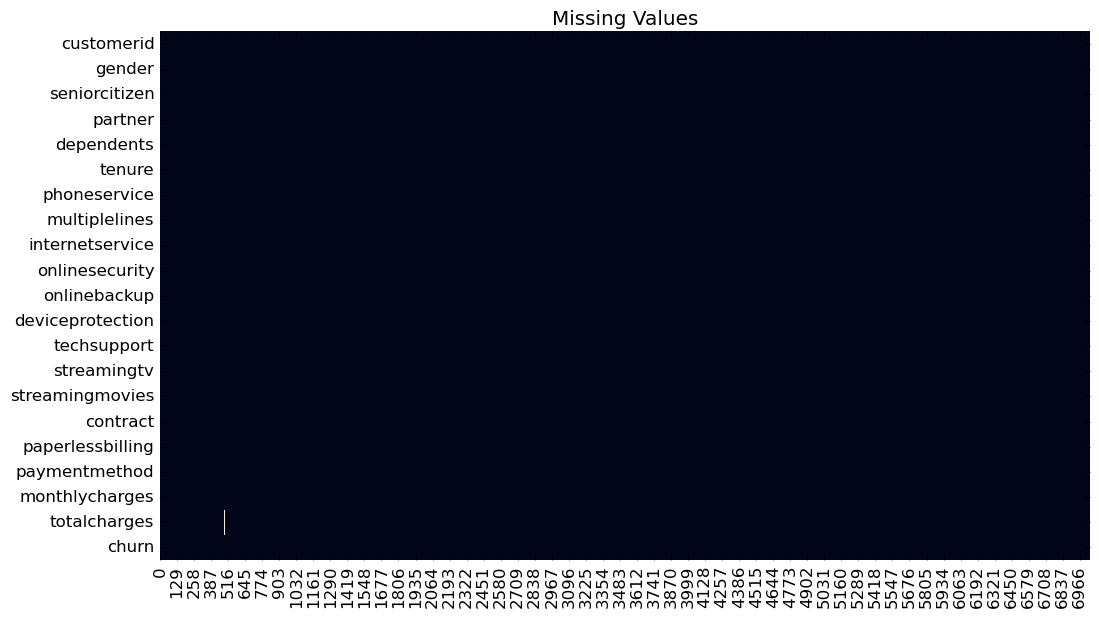

In [9]:
#plot to find missing values
fig = plt.figure(figsize=(12,7),dpi=100)
plt.style.use('classic')
fig.patch.set_facecolor('white')
plt.title('Missing Values')

sns.heatmap(df.isna().T, cbar=False)
sns.set_context('talk')
#save image
plt.savefig('./images/1. Dataset Information/missing values.png', bbox_inches='tight')

In [10]:
df[df.totalcharges.isna()]

customerid  gender  seniorcitizen partner dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         deviceprotection          techsupport          streamingtv  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          streamingmovies  contract paperlessbilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  paymentmethod monthlycharges  totalcharges  churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

* We have in total **11 missing values** in column regarding **total charges**. 
* Moreover, we can observe that when **total charges is NA**, **tenure is 0**, This means that **the customer runs the first month of the contract** and **we cannot predict whether the customer will churn or not**.
* Also, **the missing values are only in 11 rows in 7043**, which is a small sample in the overall dataset.
* For the reasons above, we are going to **exclude** them from our data.

In [11]:
#drop rows with missing values (total charges)
df = df.dropna()

* We will **delete the column** ***CustomerID*** since it does not give us any information and then we will create a copy of our data before we continue with one hot encoding

In [12]:
#delete column CustomerID
df = df.drop('customerid',axis=1)

In [13]:
#we create a copy of the dataset
data = df.copy()

### One Hot Encoding for Categorical Features

* Let's execute **one hot encoding transformation** for **categorical** features.

In [14]:
#replace Yes,No -> 1,0
map_yes_no = {'Yes':1,'No':0}

data['partner'] = data.partner.map(map_yes_no)
data['dependents'] = data.dependents.map(map_yes_no)
data['phoneservice'] = data.phoneservice.map(map_yes_no)
data['paperlessbilling'] = data.paperlessbilling.map(map_yes_no)
data['churn'] = data.churn.map(map_yes_no)

* Since we have a column about telephone service, to keep track of whether or not the customer has telephone service, we will replace the value ***No Phone Service*** with ***0*** in the column **multiplelines** that include it.


In [15]:
#replace Yes,No,No phone service -> 1,0,0
map_yes_no_phone_service = {'Yes':1,'No':0,'No phone service':0}

data['multiplelines'] = data.multiplelines.map(map_yes_no_phone_service)

* Same as before, we replace the value ***No internet service*** with ***0***.

In [16]:
#replace Yes,No,No internet service -> 1,0,0
map_yes_no_internet_service = {'Yes':1,'No':0,'No internet service':0}

data['onlinesecurity'] = data.onlinesecurity.map(map_yes_no_internet_service)
data['onlinebackup'] = data.onlinebackup.map(map_yes_no_internet_service)
data['deviceprotection'] = data.deviceprotection.map(map_yes_no_internet_service)
data['techsupport'] = data.techsupport.map(map_yes_no_internet_service)
data['streamingtv'] = data.streamingtv.map(map_yes_no_internet_service)
data['streamingmovies'] = data.streamingmovies.map(map_yes_no_internet_service)

* We can also, specify that **in our data we have information regarding automatic payment method**. 
* Thus, we are going to **create a new column** named **automatic_paymentmethod** to keep track of this information.

In [17]:
#create automatic payment method column
data['automatic_paymentmethod'] = np.where(data.paymentmethod.str.endswith('(automatic)', na=False) == True,1,0)

# remove the text "(automatic)" from the initial column
data['paymentmethod'] = data['paymentmethod'].apply(lambda x: x.split(' (')[0])

* Last, we will get **dummies** for the remaining columns.

In [18]:
#get dummies for the columns internetservice,contract,paymentmethod
dummies_columns = ['gender','internetservice','contract','paymentmethod']
data = pd.get_dummies(data, columns=dummies_columns)

#move column regarding Churn to the end of our dataframe
new_cols = [col for col in data.columns if (col != 'churn') & (col != 'monthlycharges') & (col !='totalcharges')] +\
                                ['monthlycharges','totalcharges','churn']

data = data[new_cols]

data

seniorcitizen  partner  dependents  tenure  phoneservice  multiplelines  \
0                 0        1           0       1             0              0   
1                 0        0           0      34             1              0   
2                 0        0           0       2             1              0   
3                 0        0           0      45             0              0   
4                 0        0           0       2             1              0   
...             ...      ...         ...     ...           ...            ...   
7038              0        1           1      24             1              1   
7039              0        1           1      72             1              1   
7040              0        1           1      11             0              0   
7041              1        1           0       4             1              1   
7042              0        0           0      66             1              0   

      onlinesecurity  onlinebackup  deviceprotection  techsupport  ...  \
0                  0             1                 0            0  ...   
1                  1             0                 1            0  ...   
2                  1             1                 0            0  ...   
3                  1             0                 1            1  ...   
4                  0             0                 0            0  ...   
...              ...           ...               ...          ...  ...   
7038               1             0                 1            1  ...   
7039               0             1                 1            0  ...   
7040               1             0                 0            0  ...   
7041               0             0                 0            0  ...   
7042               1             0                 1            1  ...   

      contract_Month-to-month  contract_One year  contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      paymentmethod_Bank transfer  paymentmethod_Credit card  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               1                          0   
4                               0                          0   
...                           ...                        ...   
7038                            0                          0   
7039                            0                          1   
7040                            0                          0   
7041                            0                          0   
7042                            1                          0   

      paymentmethod_Electronic check  paymentmethod_Mailed check  \
0                                  1                           0   
1                                  0                           1   
2                                  0                           1   
3                                  0                           0   
4                                  1                           0   
...                              ...                         ...   
7038                               0          

* We have created a deep copy of the orginal dataset which includes the label encoding of the text data.
* Modifications in the original dataset will not be highlighted in this deep copy.
* Hence, we will use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
* We now print the descriptive stats of the data.

In [19]:
#Descriptive analysis
data.describe()

seniorcitizen  partner  dependents  tenure  phoneservice  \
count        7032.00  7032.00     7032.00 7032.00       7032.00   
mean            0.16     0.48        0.30   32.42          0.90   
std             0.37     0.50        0.46   24.55          0.30   
min             0.00     0.00        0.00    1.00          0.00   
25%             0.00     0.00        0.00    9.00          1.00   
50%             0.00     0.00        0.00   29.00          1.00   
75%             0.00     1.00        1.00   55.00          1.00   
max             1.00     1.00        1.00   72.00          1.00   

       multiplelines  onlinesecurity  onlinebackup  deviceprotection  \
count        7032.00         7032.00       7032.00           7032.00   
mean            0.42            0.29          0.34              0.34   
std             0.49            0.45          0.48              0.48   
min             0.00            0.00          0.00              0.00   
25%             0.00            0.00          0.00              0.00   
50%             0.00            0.00          0.00              0.00   
75%             1.00            1.00          1.00              1.00   
max             1.00            1.00          1.00              1.00   

       techsupport  ...  contract_Month-to-month  contract_One year  \
count      7032.00  ...                  7032.00            7032.00   
mean          0.29  ...                     0.55               0.21   
std           0.45  ...                     0.50               0.41   
min           0.00  ...                     0.00               0.00   
25%           0.00  ...                     0.00               0.00   
50%           0.00  ...                     1.00               0.00   
75%           1.00  ...                     1.00               0.00   
max           1.00  ...                     1.00               1.00   

       contract_Two year  paymentmethod_Bank transfer  \
count            7032.00                      7032.00   
mean                0.24                         0.22   
std                 0.43                         0.41   
min                 0.00                         0.00   
25%                 0.00                         0.00   
50%                 0.00                         0.00   
75%                 0.00                         0.00   
max                 1.00                         1.00   

       paymentmethod_Credit card  paymentmethod_Electronic check  \
count                    7032.00                         7032.00   
mean                        0.22                            0.34   
std                         0.41                            0.47   
min                         0.00                            0.00   
25%                         0.00                            0.00   
50%                         0.00                            0.00   
75%                         0.00                            1.00   
max                         1.00                            1.00   

       paymentmethod_Mailed check  monthlycharges  totalcharges   churn  
count                     7032.00         7032.00       7032.00 7032.00  
mean                         0.23           64.80       2283.30    0.27  
std                          0.42           30.09       2266.77    0.44  
min                          0.00           18.25         18.80    0.00  
25%                          0.00           35.59        401.45    0.00  
50%                          0.00           70.35       1397.48    0.00  
75%                          0.00           89.86       3794.74    1.00  
max                          1.00          118.75       8684.80    1.00  

[8 rows x 29 columns]

### Mean values of all the features for churned and not-churned customers.

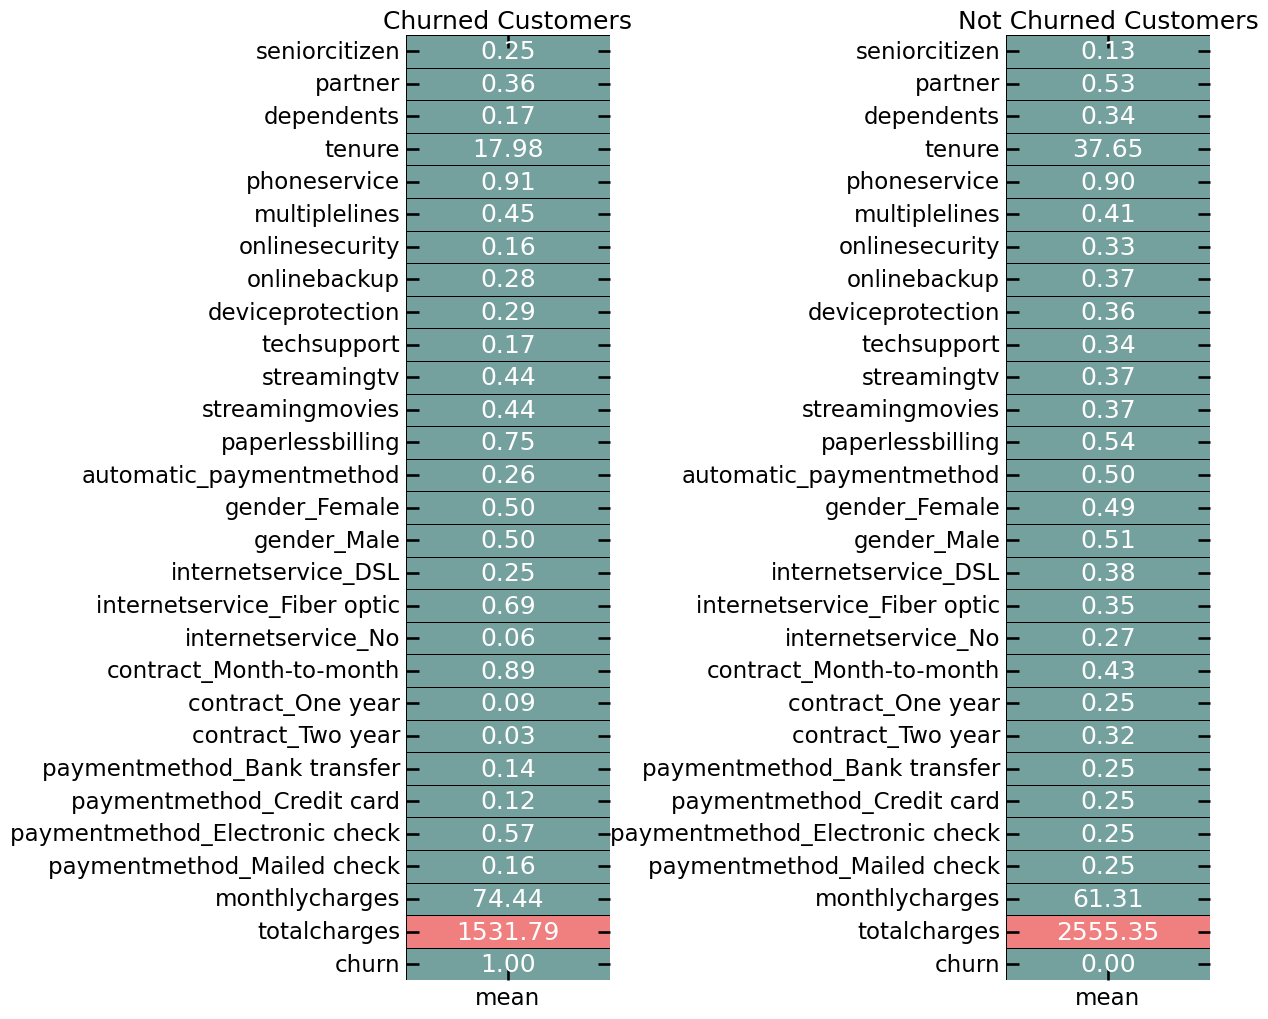

In [20]:
#define colors
colors = ['#74a09e','lightcoral']

#isolate churned and not-churned customers
churn = data[data['churn'] == 1].describe().T
not_churn = data[data['churn'] == 0].describe().T

#create figure
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (12,10),dpi=100)

#heatmap for churned customers
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers')

#heatmap for not-churned customers
plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Not Churned Customers')
fig.patch.set_facecolor('white')
fig.tight_layout(pad = 0)
#save image
plt.savefig('./images/1. Dataset Information/mean values.png', bbox_inches='tight')

* From the above heatmap it is obvious that the customers that churned had a low mean **tenure** of **17.98** months as compared to those who continued with an average **tenure** period of **37.57** months.
* Mean values of **onlinesecurity**, **onlinebackup**, **deviceprotection** and **techsupport** are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
* Churned customer's **contract** value is much smaller than those of not-churned customers.
* Mean values of **streamingtv**, **streammovies** and **paperlessbilling** regarding churned customers are higher from not-churned which possibly means that churned customers are likely to **use technology more**.
* Not-churned customers are more likely to use **automatic_paymentmethod** than churned ones.
* Also, mean values for **internetservice_DSL** and **internetservice_No** are higher for not_churned than churn customer while the opossite is true regarding **internetservice_Fiver optic**.
* Mean values for **contract_One year** and **contract_two year** are lower for churned customer than not-churned while **contract_Month-to-month** is lower for not-churned.
* Regarding payment method, not churned cutomers have higher mean values for **paymentmethod_Bank transfer**, **paymentmethod_Credit card** and **paymentmethod_Mailed check** and **lower** mean value for **paymentmethod_Electronic check** than churned ones.
* Mean **monthlycharges** of the churn customers, **74.44**, is more than that of not-churn customers, **61.31**, as opposed to **totalcharges** which are **higher for not-churned** customers, **2555.35, than churned, 1531.79**.
* From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.

> ## Exploratory Data Analysis

In [21]:
#create df for eda
data_eda = df.copy()

* We will start by **dividing features** into **numerical** and **categorical**.
* Since we have implemented one hot encoding for the categorical variables, the dividing of the features will be based on the condition if the attribute has more than two unique values then will be numerical, else categorical.

In [22]:
data_eda.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [23]:
data_eda.paymentmethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: paymentmethod, dtype: int64

In [24]:
#define lists
numerical_features = []
categorical_features = []

for col in data_eda.columns:
    #since the max number of different values for categorical variables are 4, we set that threshold
    if len(data_eda[col].unique()) > 4:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print(f'Numerical Features : {numerical_features}', end='\n\n')
print(f'Categorical Features : {categorical_features}', end='\n\n')

Numerical Features : ['tenure', 'monthlycharges', 'totalcharges']

Categorical Features : ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']



### Visualization of Target Variable (Churn)

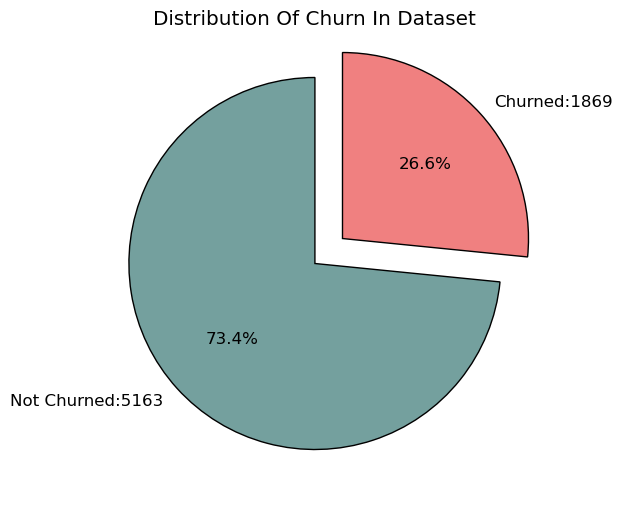

In [25]:
#define colors
colors = ['#74a09e','lightcoral']

#create figure
fig = plt.figure(figsize=(6,6),dpi=100)
plt.style.use('classic')
fig.patch.set_facecolor('white')
counts = [data_eda['churn'].value_counts().iloc[0], data_eda['churn'].value_counts().iloc[1]]
labels = [f'Not Churned:{counts[0]}', f'Churned:{counts[1]}']

#plot
plt.pie(counts, labels=labels,explode = (0, 0.2),autopct = '%1.1f%%',startangle = 90,colors=colors,textprops={'color':'black'})
plt.title('Distribution Of Churn In Dataset',color = 'black')
plt.show()
#save image
fig.savefig('./images/2. EDA/Distribution of churn.png', bbox_inches='tight')

* As we can see from the chart above, the dataset is **unbalanced** in a near about **3 : 1 ratio** for **Νot-Churn : Churn** customers.
* Due to this, **predictions will be biased towards Not-Churn customers**.

### Numerical Features vs Target Variable (Churn)

* For the numeric features kernel density estimate (KDE) functions are caluclated and plotted.

**[INFO]:** *A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.*


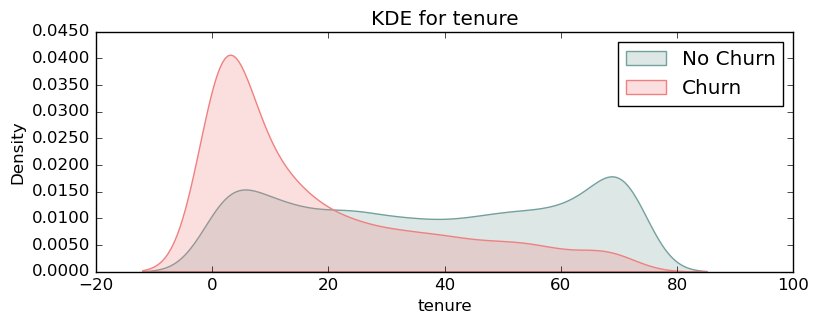

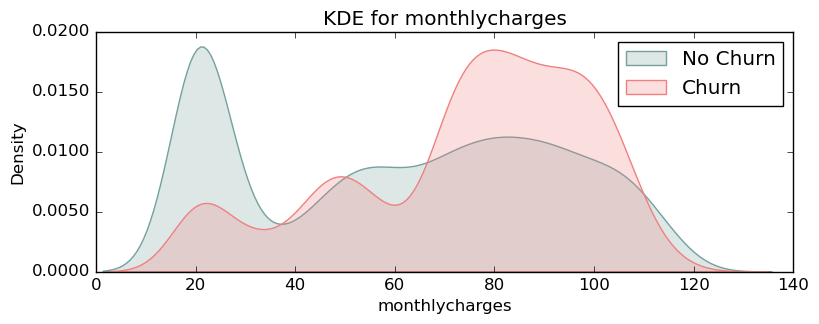

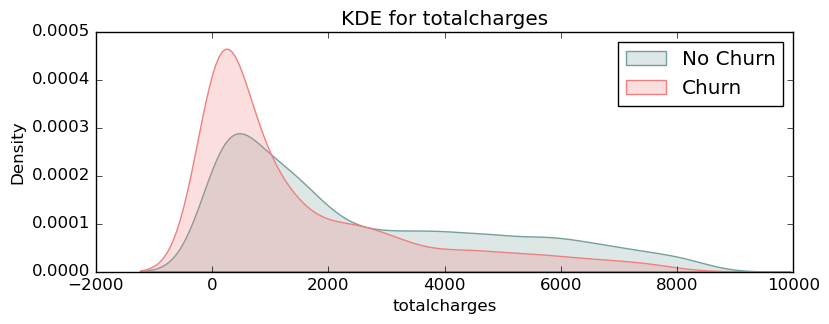

In [26]:
#plot all the numerical features
for feature in numerical_features:
    #function to create KDEplots for numeric features
    kdeplot(f'{feature}',data_eda,colors)

* Analysing the above distribution diagrams, **tenure** and **monthlycharges** kind of create a **bimodal distribution** with **peaks present at 0 - 70 and 20 - 80** respectively.
* On the other hand, **totalcharges** displays a **rightly skewed distribution**.

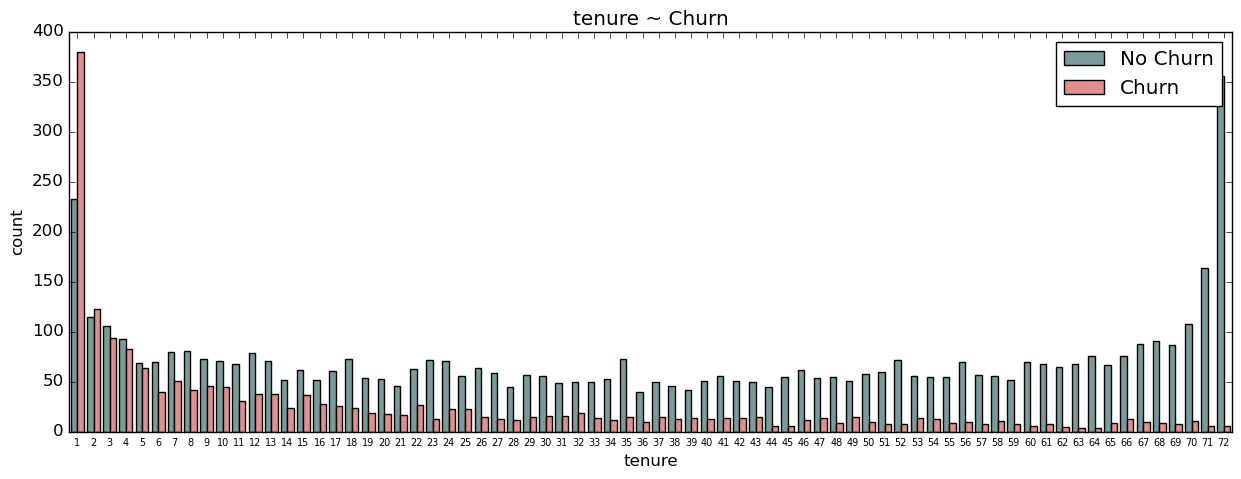

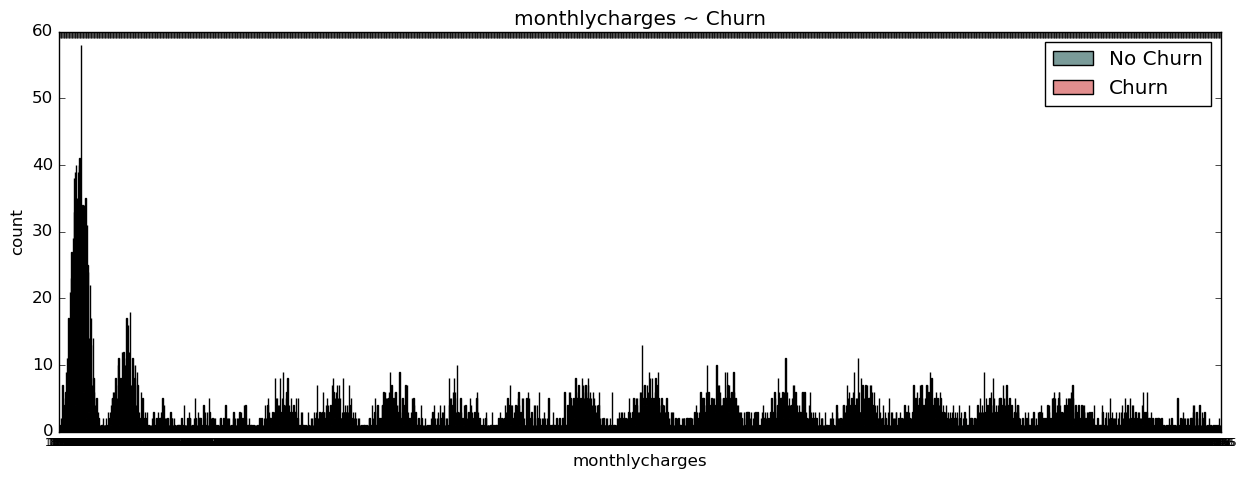

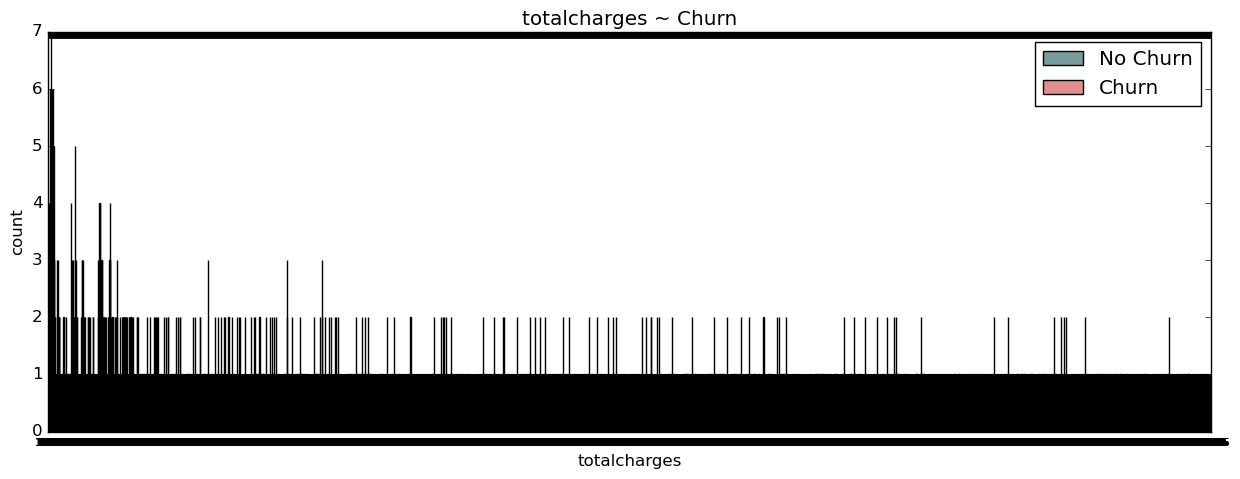

In [27]:
#plot all the numerical features
for feature in numerical_features:
    #function to create countplots for numeric features
    countplot(f'{feature}',data_eda,colors)

* Considering **tenure**, a **high** number of customers **have left after the 1st month**. This **high cancellation** of services continues **for 4 - 5 months** but the **churn** customers have **reduced** since the 1st month. **As the tenure increases, customers dropping out decreases**.
* Since we have too many unique datapoints regarding **monthlycharges** and **totalcharges**, we are going to **scale** these numerical features for understandable visualization and gaining insights purposes. 

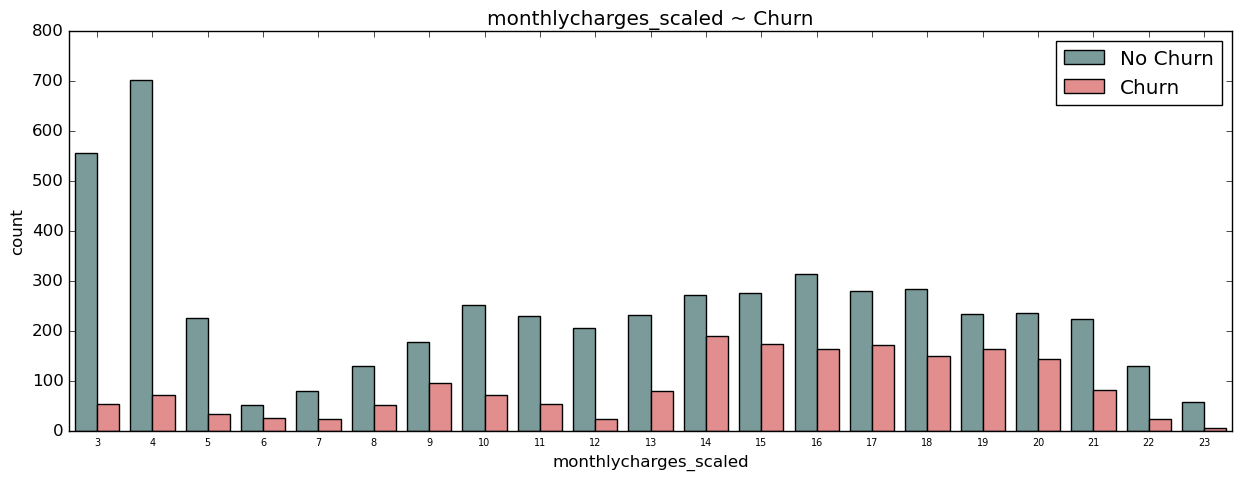

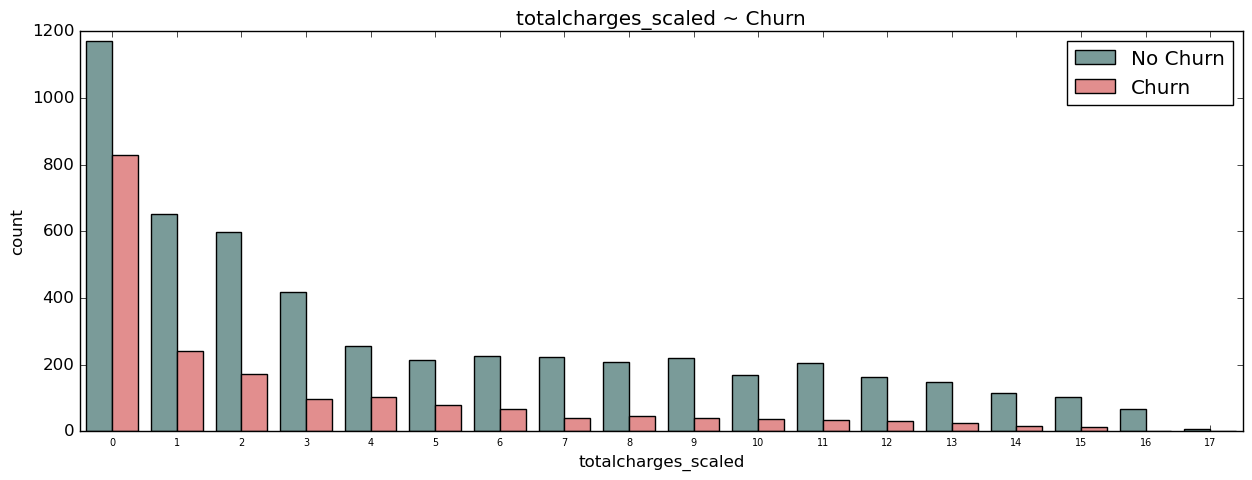

In [28]:
#scale monthlycharges and totalcharges based on the data distribution and intuition.
data_eda['monthlycharges_scaled'] = [int(i / 5) for i in data_eda['monthlycharges']]
data_eda['totalcharges_scaled'] = [int(i / 500) for i in data_eda['totalcharges']]

#define new scaled numerical features
scaled_numerical_features = ['monthlycharges_scaled','totalcharges_scaled']

#plot all the numerical features
for feature in scaled_numerical_features:
    countplot(f'{feature}',data_eda,colors)

* For **monthlycharges_scaled**, we can say that the **churn rate is high** for the values between **70 (14 * 5) - 100 (20 * 5)**. This **monthlycharges** range of values caused the customers to switch.
* A very **high number** of customers **leave the service** for totalcharges **lower than 500 (1 * 500)**. This **customer churning continues** for a **totalcharges** range of values **from 0 (0x500) - 1000 (2x500)**.

### Combination of Numerical features vs Target variable (Churn)

In [29]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

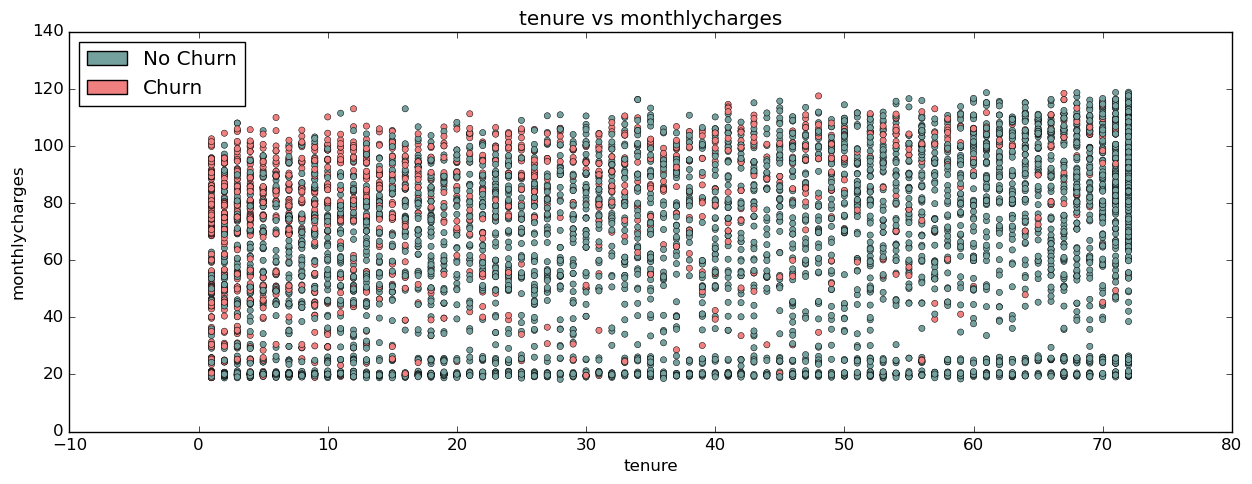

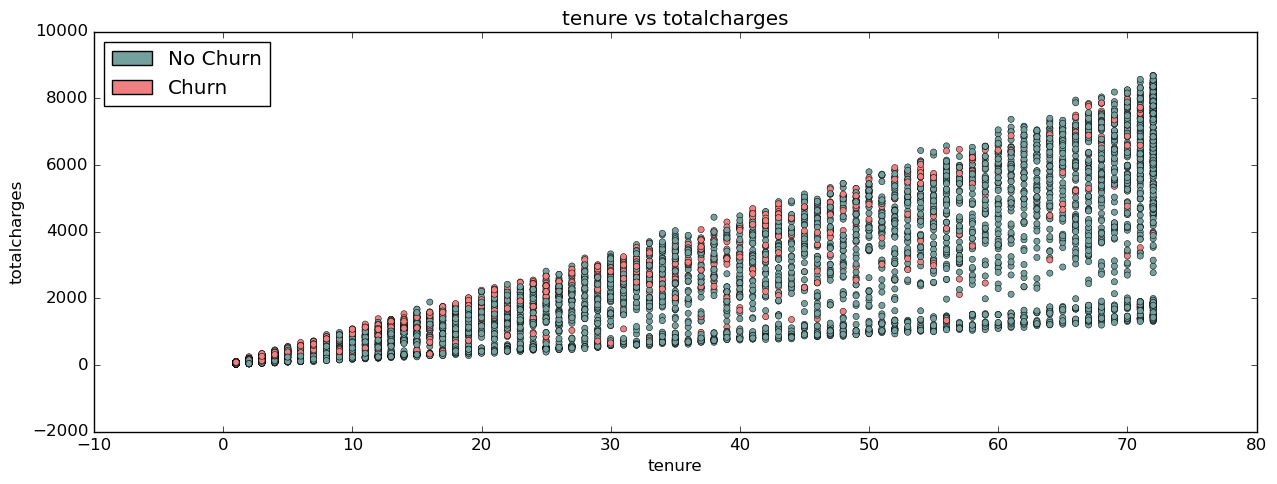

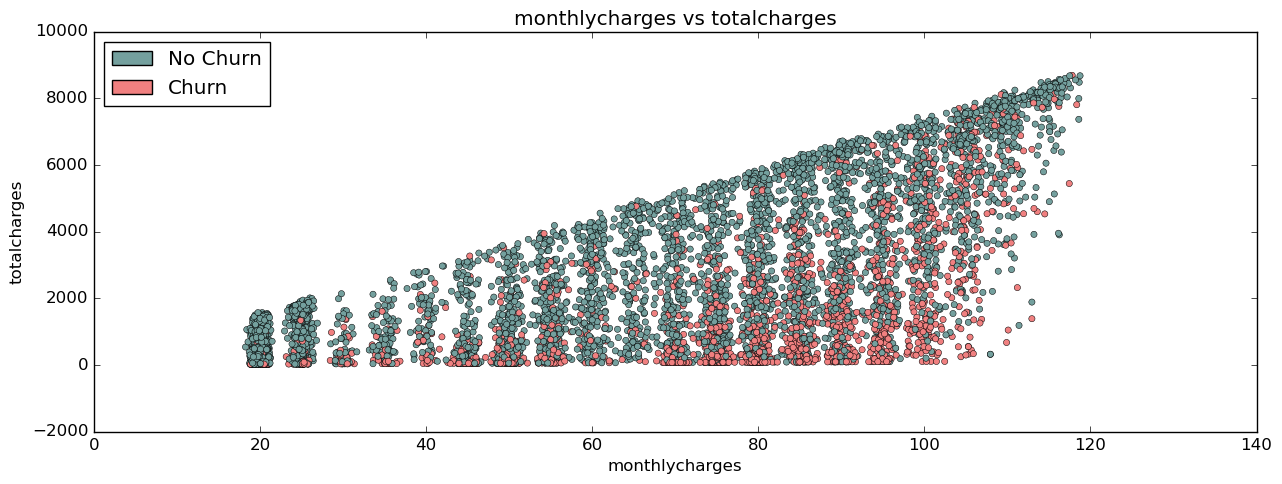

In [30]:
#loop in every pair
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            #create figure
            fig = plt.figure(figsize=(15,5), dpi=100)
            fig.patch.set_facecolor('white')
            plt.style.use('classic')
            
            #scatterplot
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data_eda,\
                            hue = 'churn',palette = colors,edgecolor = 'black')
            
            #legend
            classes = ['No Churn','Churn']
            class_colours = colors
            recs = []
            for index in range(0,len(class_colours)):
                recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[index]))
            plt.legend(recs,classes,loc = 'upper left')
            
            #title
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)
            
            #save image
            fig.savefig(f"./images/2. EDA/{numerical_features[i]} vs {numerical_features[j]}.png", bbox_inches='tight')
            
            

* For **tenure of 0 - 20 months** period, **customers churn quite at any monthlycharges value**. For a tenure period from **20 - 60 months**, **customers at the top end of the monthlycharges values, 70 - 120, start to drop out from the services.**
* For **totalcharges vs tenure, as tenure increases, TotalCharges increase as well**. Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose **totalcharges rank in the middle**.
* Customers seemed to have decided to **cancel their subscriptions when the monthlycharges reach 70 and above**.

### Categorical Features vs Target Variable (Churn)

* We will **remove churn** from the categorical features list for visualization purposes.

In [31]:
categorical_features.remove('churn')

* We will split the categorical variables into 3 groups based on the information they provide
 * **Group1** **~>** customer information
 * **Group2** **~>** services information
 * **Group3** **~>** payment information

In [32]:
#group1
customer_info = ['gender','seniorcitizen','partner','dependents']

#group2
services_info = ['phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection',\
                 'techsupport','streamingtv','streamingmovies']

#group3
payment_info = ['contract','paperlessbilling','paymentmethod']

### Group 1 ~> Customer Information

In [33]:
data_eda

gender  seniorcitizen partner dependents  tenure phoneservice  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         multiplelines internetservice onlinesecurity onlinebackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     streamingtv streamingmovies        contract paperlessbilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  paymentmethod monthlycharges totalcharges  churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50     No   
7039    Credit card (automatic)         103.20      7362.90     No   
7040           Electronic check          29.60       346.45     No   
7041               Mailed check          74.40       306.60    Yes   
7042  Bank transfer (automatic)         105.65      6844.50     No   

      monthlycharges_scaled totalcharges_scaled  
0                         5                   0  
1                        11                   3  
2                        10                   0  
3                         8                   3  
4                        14                   0  
...                     ...                 ...  
7038                     16                   3  
7039                     20                  14  
7040                      5                   0  
7041                     14                   0  
7042                     21     

In [35]:
#values of customer_info
for feature in customer_info:
    print('Churn')
    print(data_eda.loc[data_eda['churn'] == 'Yes',f'{feature}'].value_counts(), end = '\n\n')
    print('Not Churn')
    print(data_eda.loc[data_eda['churn'] == 'No',f'{feature}'].value_counts(), end = '\n\n')
    
    print("-"*30)

Churn
Female    939
Male      930
Name: gender, dtype: int64

Not Churn
Male      2619
Female    2544
Name: gender, dtype: int64

------------------------------
Churn
0    1393
1     476
Name: seniorcitizen, dtype: int64

Not Churn
0    4497
1     666
Name: seniorcitizen, dtype: int64

------------------------------
Churn
No     1200
Yes     669
Name: partner, dtype: int64

Not Churn
Yes    2724
No     2439
Name: partner, dtype: int64

------------------------------
Churn
No     1543
Yes     326
Name: dependents, dtype: int64

Not Churn
No     3390
Yes    1773
Name: dependents, dtype: int64

------------------------------


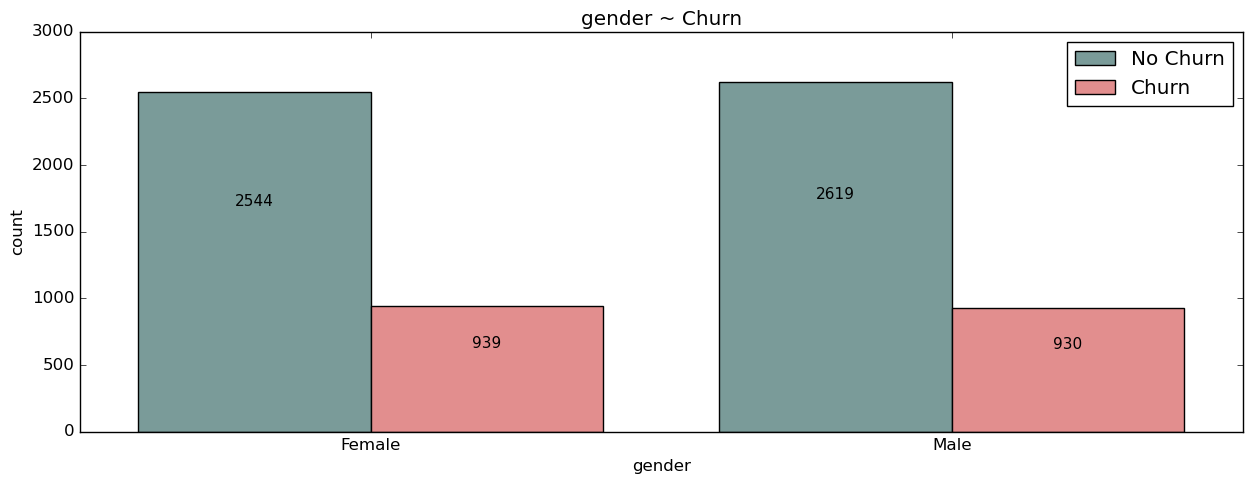

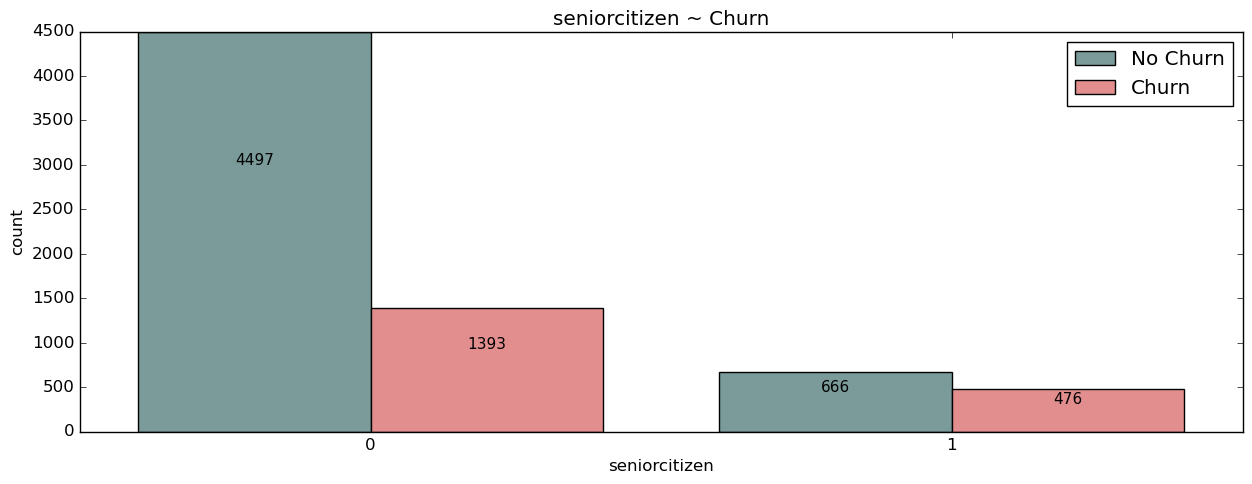

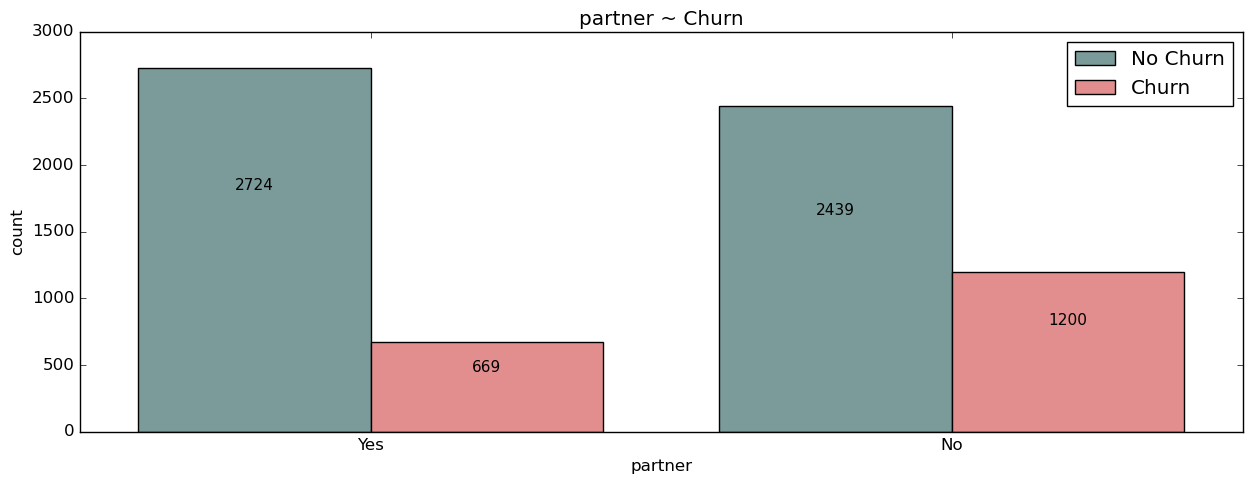

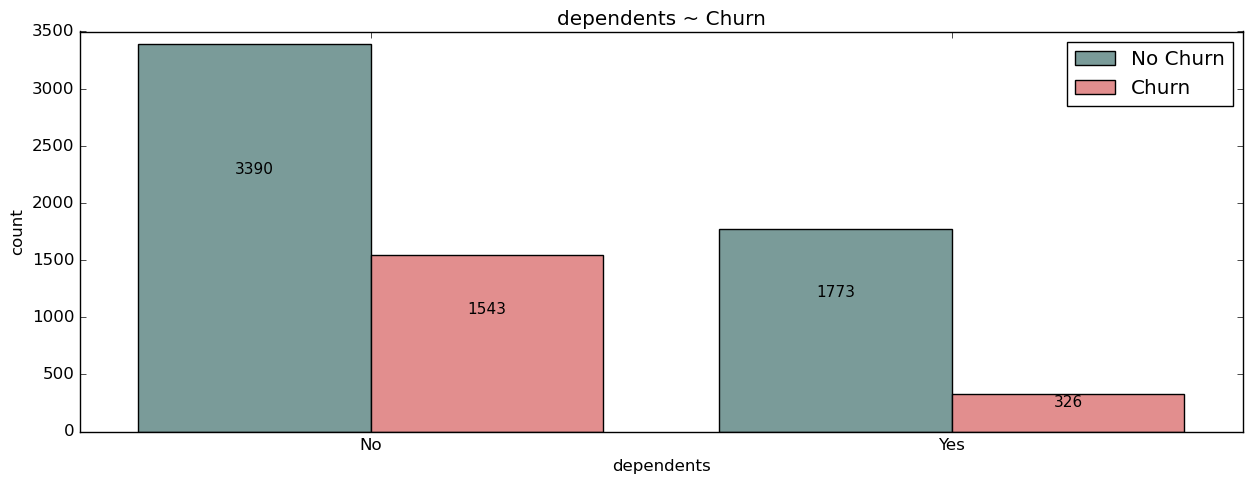

In [36]:
#plot customer_info
for feature in customer_info:
    #function for barplots for categorical features
    barplot(f'{feature}',data_eda,colors)

* Customer churn is **not related to gender**, since both male & female are very similar.
* Regarding seniorsitizen, we can observe that **if a customer is a senior sitizen, then the possibility to churn is about 42% (476 out of 1142)**.
* If a customer **has partner**, then it is **less possible to churn** compared to those living alone.
* Same as before, if a customer **has dependents then it is less possible to churn**.

### Group2 ~> Services Information

In [37]:
#values of services_info
for feature in services_info:
    print('Churn')
    print(data_eda.loc[data_eda['churn'] == 'Yes',f'{feature}'].value_counts(), end = '\n\n')
    print('Not Churn')
    print(data_eda.loc[data_eda['churn'] == 'No',f'{feature}'].value_counts(), end = '\n\n')
    
    print("-"*30)

Churn
Yes    1699
No      170
Name: phoneservice, dtype: int64

Not Churn
Yes    4653
No      510
Name: phoneservice, dtype: int64

------------------------------
Churn
Yes                 850
No                  849
No phone service    170
Name: multiplelines, dtype: int64

Not Churn
No                  2536
Yes                 2117
No phone service     510
Name: multiplelines, dtype: int64

------------------------------
Churn
Fiber optic    1297
DSL             459
No              113
Name: internetservice, dtype: int64

Not Churn
DSL            1957
Fiber optic    1799
No             1407
Name: internetservice, dtype: int64

------------------------------
Churn
No                     1461
Yes                     295
No internet service     113
Name: onlinesecurity, dtype: int64

Not Churn
No                     2036
Yes                    1720
No internet service    1407
Name: onlinesecurity, dtype: int64

------------------------------
Churn
No                     1233
Yes        

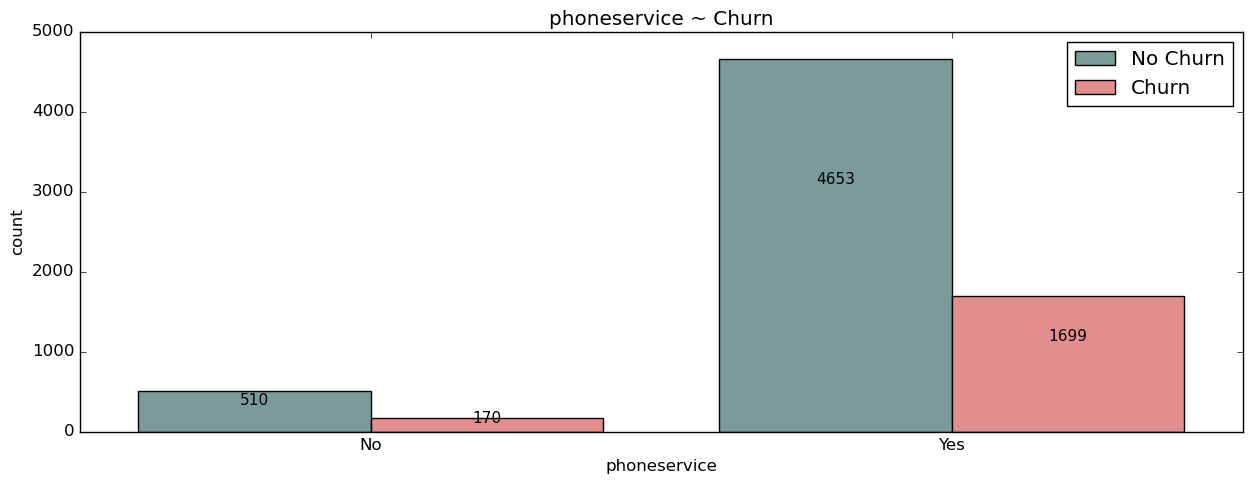

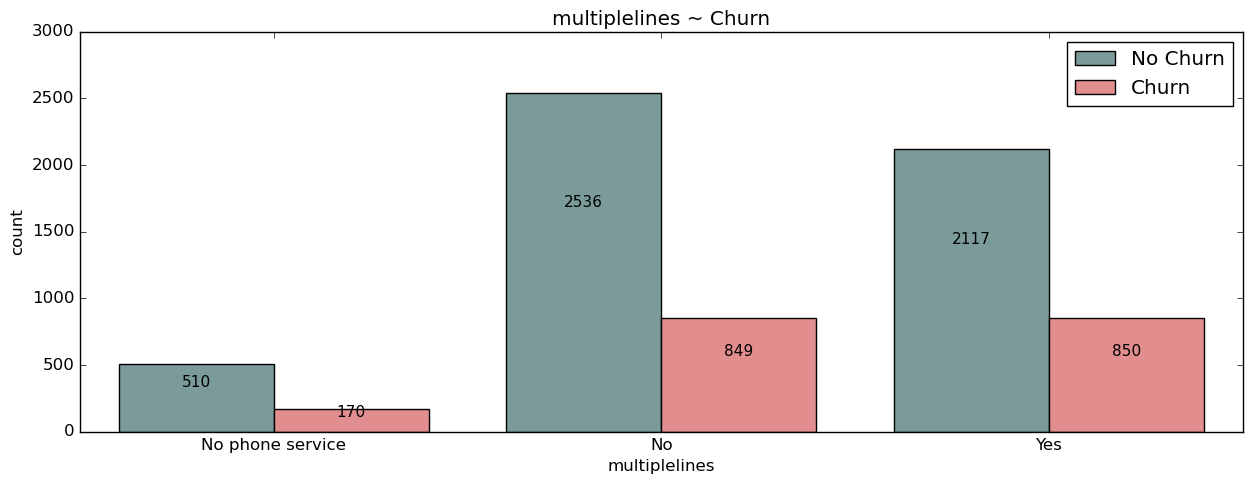

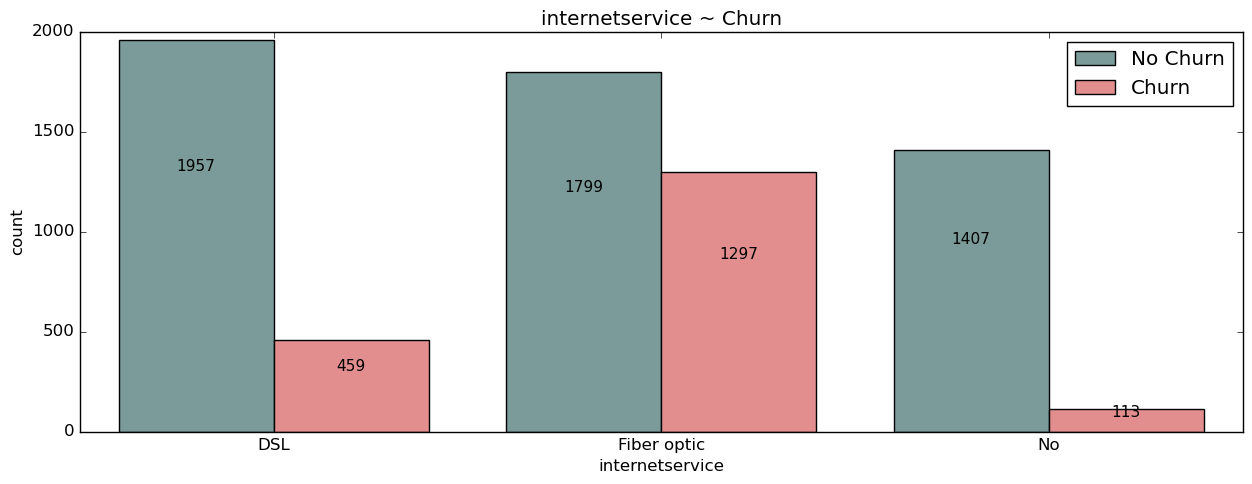

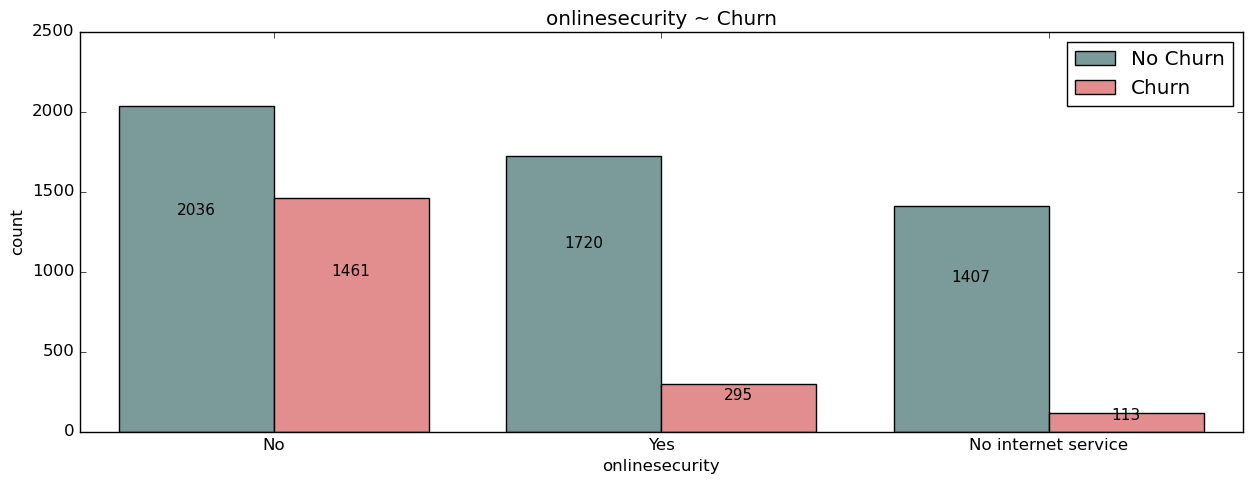

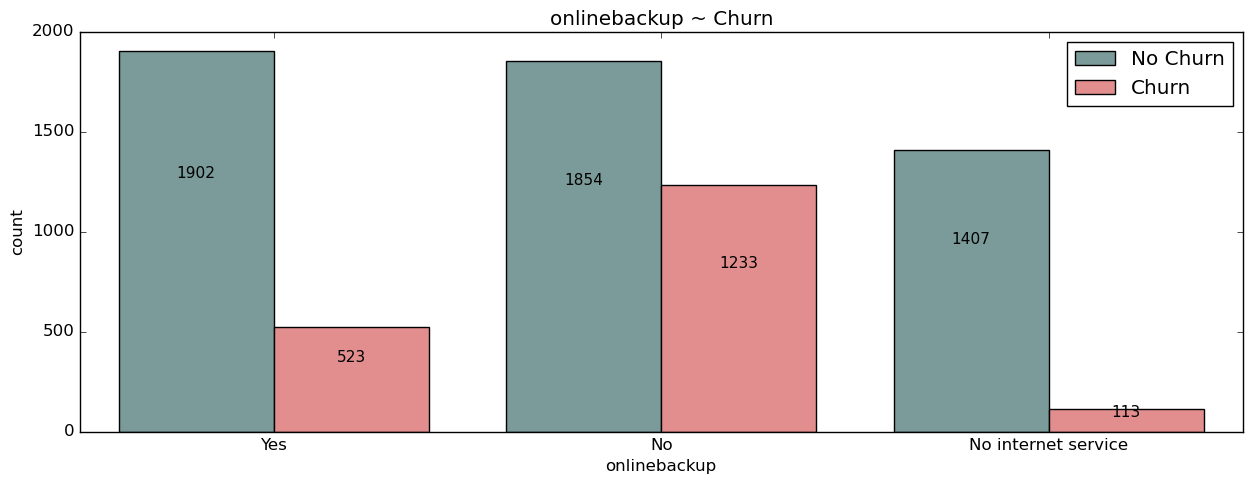

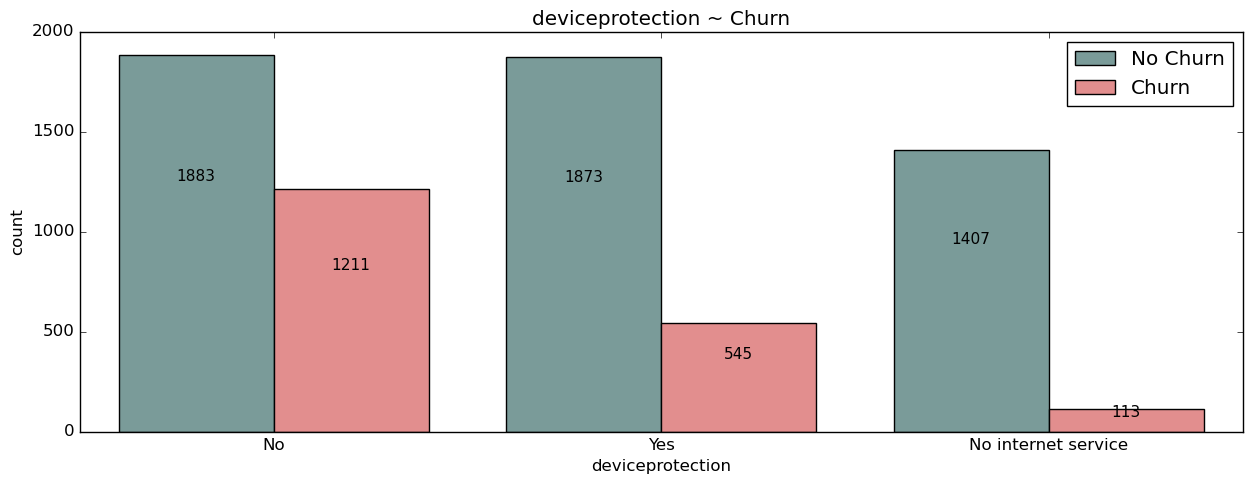

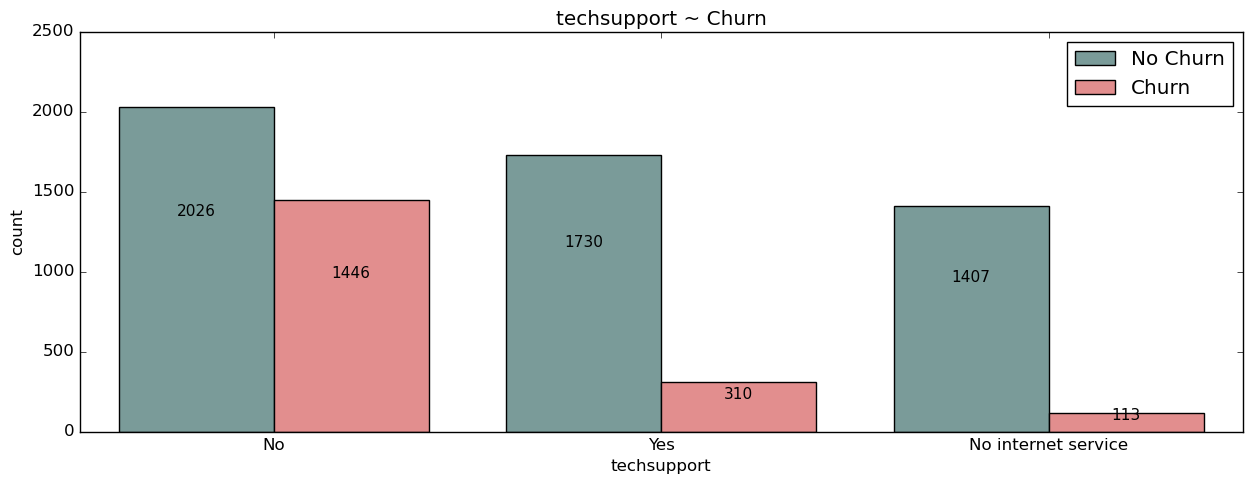

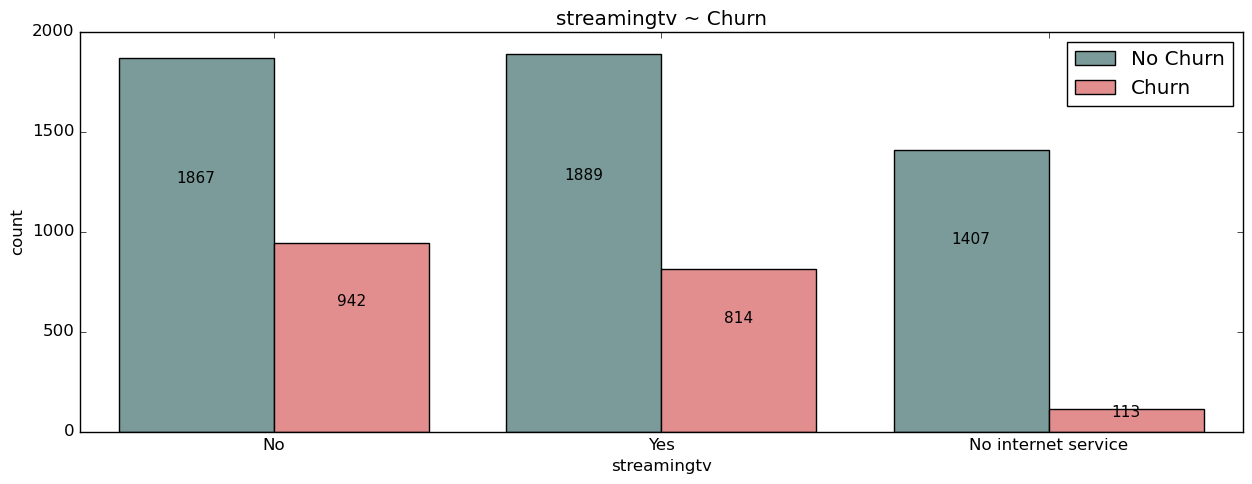

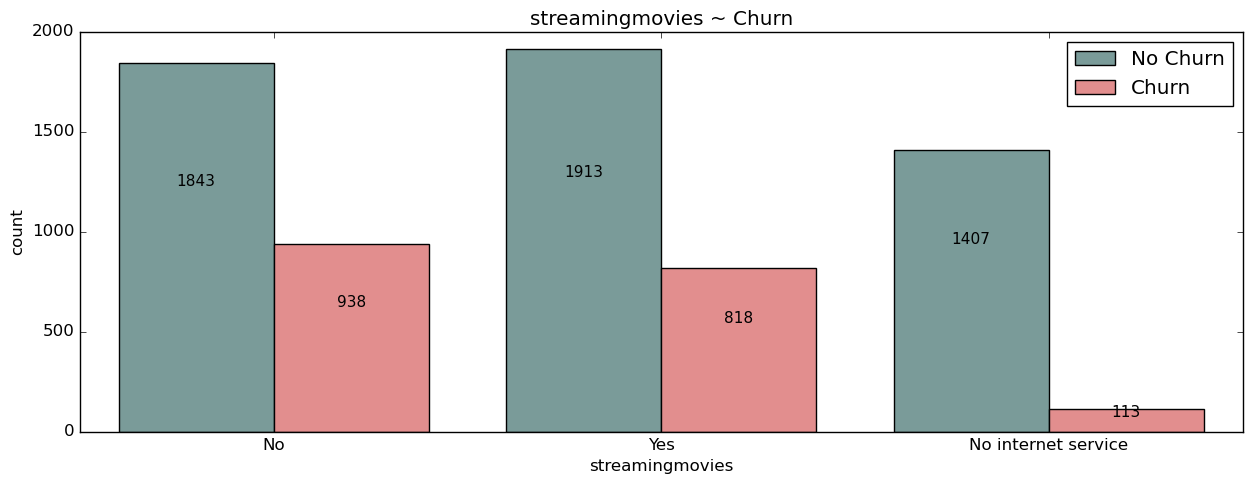

In [38]:
#plot  services_info
for feature in services_info:
    #function for barplots for categorical features
    barplot(f'{feature}',data_eda,colors)

* For **phoneservice**, despite having no phone service, **more customers were retained as compared to the number of customers who dropped the services**.
* Regarding **multiplelines**, the **churn rate** when the multiplelines are present or not **is the same**.
* A **high number of customers** have displayed their **resistance** towards the use of **Fiber optic** cables for providing the **internetservice**. On the contrary, from the above graph, **customers prefer using DSL than Fiber optic**.
* Regarding **onlinesecurity, onlinebackup, deviceprotection and techsupport**, we can see that a **high number of customers** have **switched their service provider** when it comes down **poor services**. So, we can observe that this is a very **critical factor** that the company needs to strengthen.
* For both **streamingtv and streamingmovies** the graph is more or less the **same**. Irrespective of being subscribed to streamingtv & streamingmovies, **a lot of customers have been churned**.

### Group3 ~> Payment Information

In [39]:
#values of payment_info
for feature in payment_info:
    print('Churn')
    print(data_eda.loc[data_eda['churn'] == 'Yes',f'{feature}'].value_counts(), end = '\n\n')
    print('Not Churn')
    print(data_eda.loc[data_eda['churn'] == 'No',f'{feature}'].value_counts(), end = '\n\n')
    
    print("-"*30)

Churn
Month-to-month    1655
One year           166
Two year            48
Name: contract, dtype: int64

Not Churn
Month-to-month    2220
Two year          1637
One year          1306
Name: contract, dtype: int64

------------------------------
Churn
Yes    1400
No      469
Name: paperlessbilling, dtype: int64

Not Churn
Yes    2768
No     2395
Name: paperlessbilling, dtype: int64

------------------------------
Churn
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: paymentmethod, dtype: int64

Not Churn
Mailed check                 1296
Electronic check             1294
Credit card (automatic)      1289
Bank transfer (automatic)    1284
Name: paymentmethod, dtype: int64

------------------------------


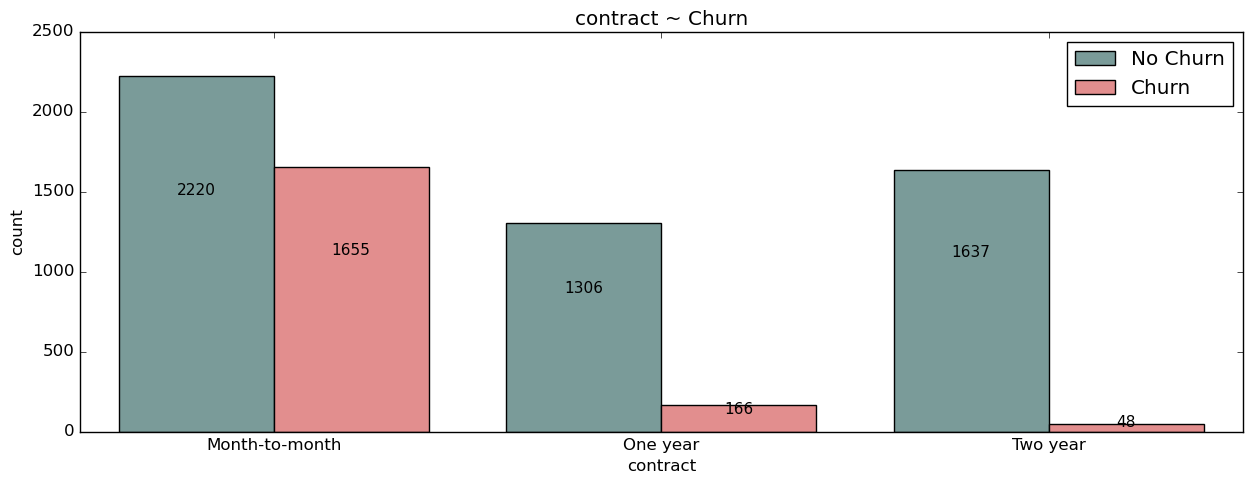

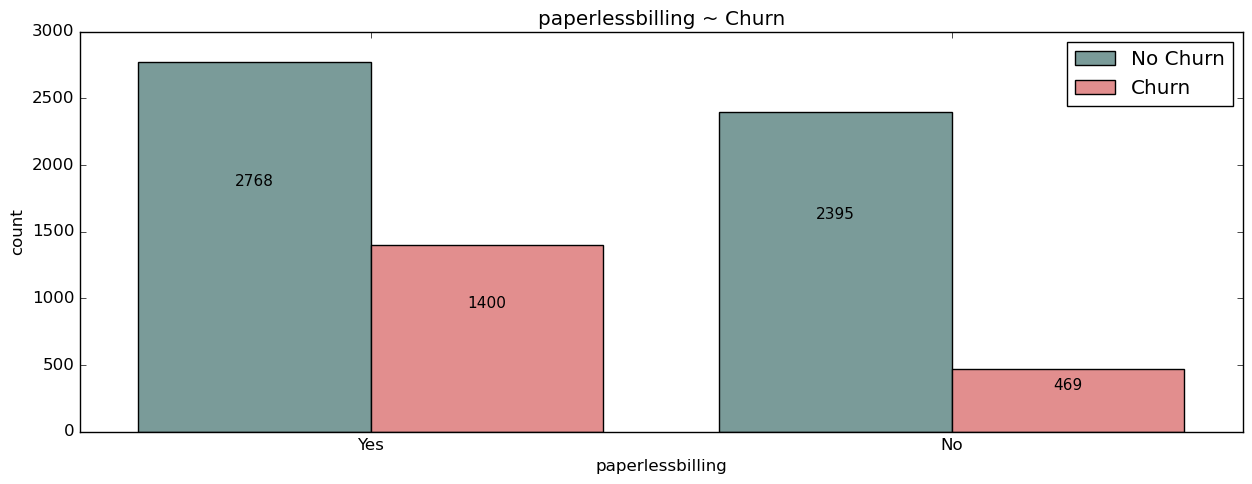

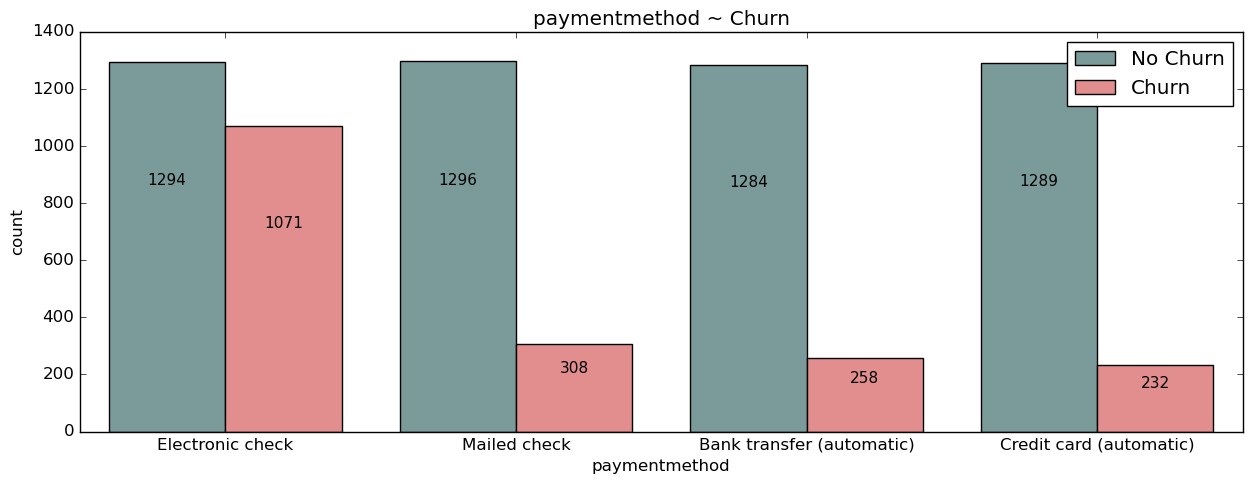

In [40]:
#plot  payment_info
for feature in payment_info:
    #function for barplots for categorical features
    barplot(f'{feature}',data_eda,colors)

* For **contract**, the **most customers** choose a **Month-to-Month** or **one years contract**. It is pretty obvious that the **churn rate** regardning **Month-to-Month contract is high** compared to the other type of contacts.
* **PaperlessBilling** displays a **high number** of customers being **churned out**. This is probably because of some payment issue or receipt issues.
* Regarding **paymentmethod**, although the customers pay more with **Electronic check**, the **churn rate** is **higher** than the other types which means that there are maybe some issues related to this payment method.

### Summary of EDA

Summarizing the Exploratory Data Analysis we can define the values of each attribute **in the most important order** related to customer **churn**

### Numerical Features
 * tenure : 1 - 5 months
 * monthly charges : 70 - 100
 * total charges : 0 - 1000

### Categorical Features
* Regarding **Customer Information**:
 * gender : male = female
 * senior citizen : No senior citizen > senior citizen
 * partner : No partner> partner
 * dependents : No dependent > dependent

* Reagrding **Services Information**:
 * phone service : phone service > No phone service
 * multiple lines : No multiple lines ~= multiple lines > No phone service
 * internet service : Fiber optic > DSL > No internet service
 * online se curity : No online security > online security > No internet service
 * online backup : No online backup > online backup > No internet service
 * device protection : No device protection > device protection > No internet service
 * techsupport : No tech support > tech support > No internet service
 * streaming tv : No streaming tv > streamikng tv > No internet service
 * streaming movies : No streaming movies > streaming movies > No internet service

* Regarding **Payment Information**: 
 * contract : Month-to-Month > One year contract > Two year
 * paperless billing : Yes > No
 * payment methid : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)

According to the EDA, these **order** of values **results in customer churn**

> ## Feature Selection

* We dived features into numerical and categorical

In [41]:
#define lists
numerical_features = []
categorical_features = []

for col in data.columns:
    #since the max number of different values for categorical variables are 4, we set that threshold
    if len(data[col].unique()) > 4:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print(f'Numerical Features : {numerical_features}', end='\n\n')
print(f'Categorical Features : {categorical_features}', end='\n\n')

Numerical Features : ['tenure', 'monthlycharges', 'totalcharges']

Categorical Features : ['seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'automatic_paymentmethod', 'gender_Female', 'gender_Male', 'internetservice_DSL', 'internetservice_Fiber optic', 'internetservice_No', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'paymentmethod_Bank transfer', 'paymentmethod_Credit card', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check', 'churn']



**Correlation Matrix**

* We will create a correlation matrix to examine if there are any correlation regarding our target variable

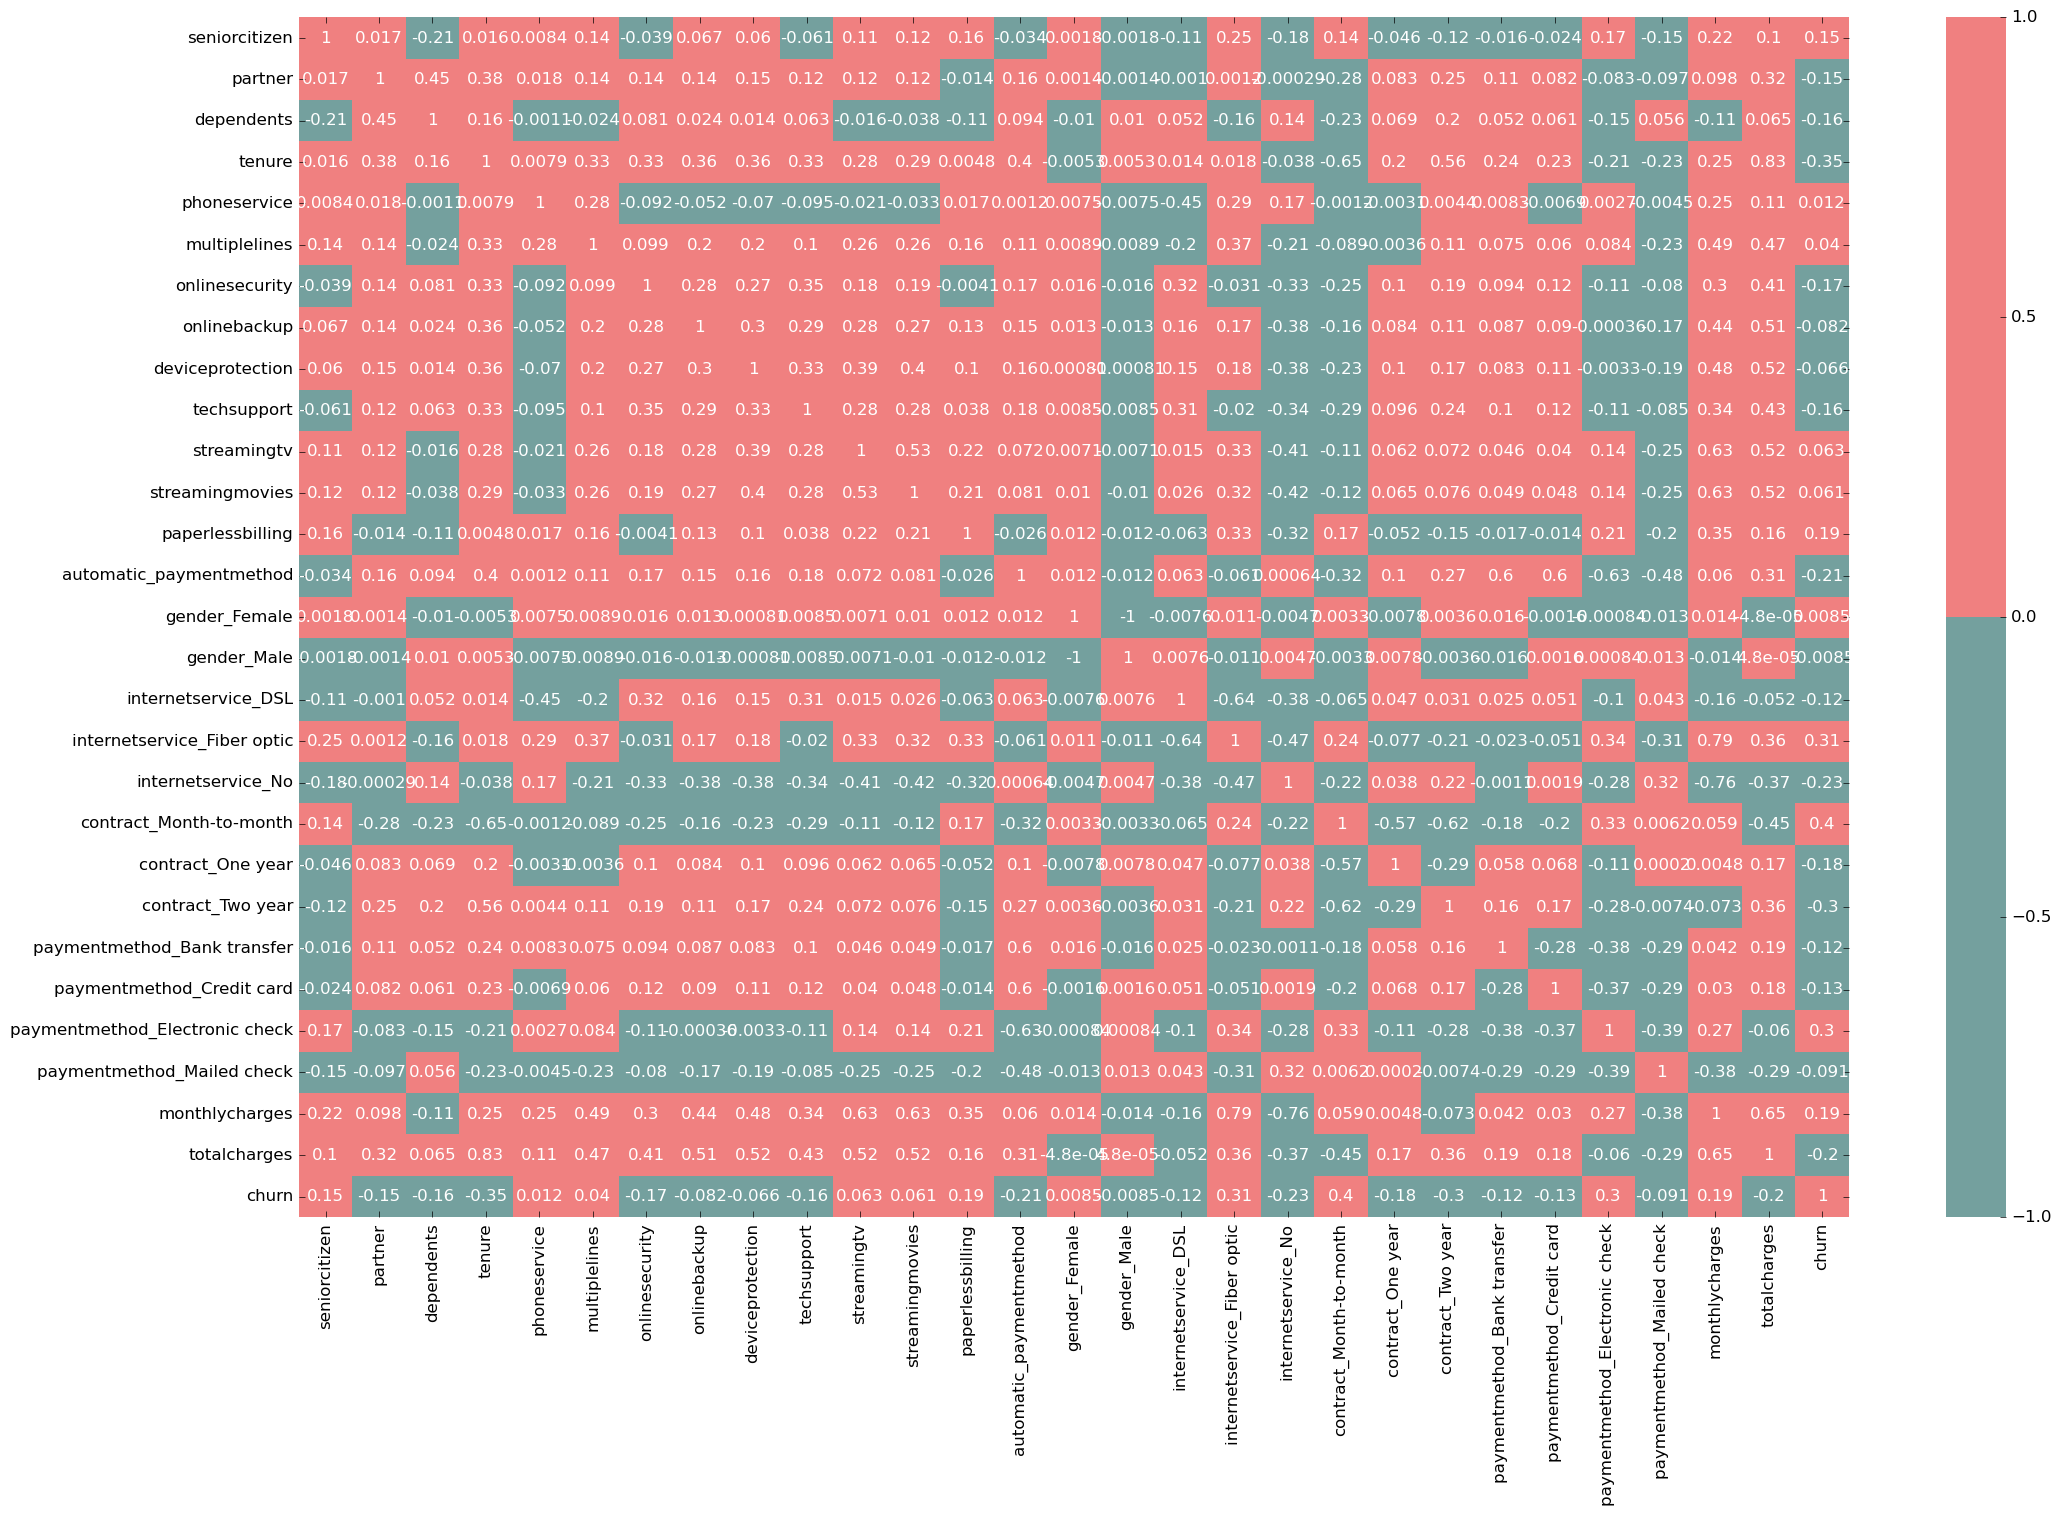

In [42]:
#create fugure
fig = plt.figure(figsize = (25,15),dpi=100)
plt.style.use('classic')
fig.patch.set_facecolor('white')

#create correlation matrix
sns.heatmap(data.corr(),cmap = colors,annot = True)

#save image
fig.savefig('./images/3. Feature Selection/Correlation Matrix.png'.format(numerical_features), bbox_inches='tight')

* Since it is a huge matrix and is difficult to understand any correlations regarding the target variable, thus we are going to isolate the correlation regarding churn.

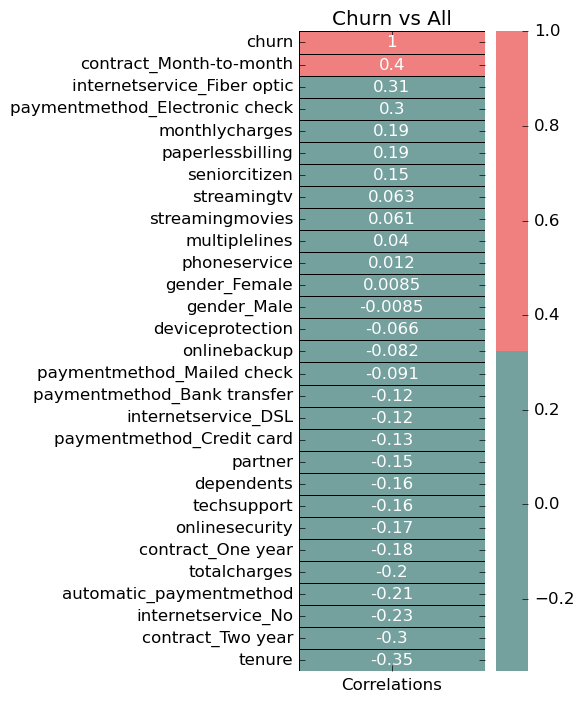

In [43]:
#correlations
corr = data.corrwith(data['churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']

#create figure
fig = plt.figure(figsize = (3,8),dpi=100)
fig.patch.set_facecolor('white')
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black')
plt.title('Churn vs All')
#save image
fig.savefig('./images/3. Feature Selection/Correlations Churn.png'.format(numerical_features), bbox_inches='tight')

* **streamingTV**, **streamingmovies**, **multiple lines**, **phoneservice**, **gender_Female**, **gender_Male**, **deviceprotrection**, **onlinebackup** and **paymentmethod_Mailed check** does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
* Remaining features either display a significant positive or negative correlation.

### Feature Selection for Categorical Features :

* We are going to execute a **Chi-squared Test**:

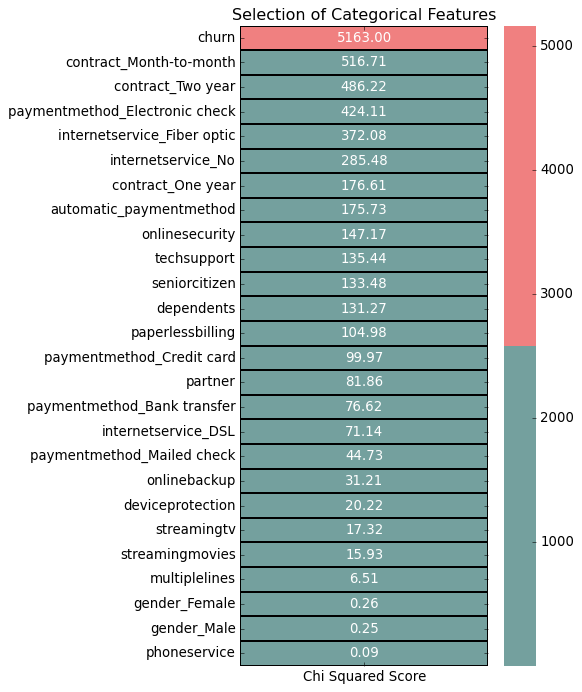

In [44]:
#define variables
features = data.loc[:,categorical_features]
target = data.loc[:,'churn']

#Chi-squared Test
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

#store best scores for each feature
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

#plot
fig = plt.figure(figsize = (5,10))
fig.patch.set_facecolor('white')
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features')
#save image
fig.savefig('./images/3. Feature Selection/Selection of Categorical Features.png', bbox_inches='tight')

* **phoneservice**, **gender_Male**, **gender_Female**, **multiplelines** display a very **low relation with Churn**.

### Feature Selection for Numerical Features

* We are going to run an **ANOVA test** for numerical features

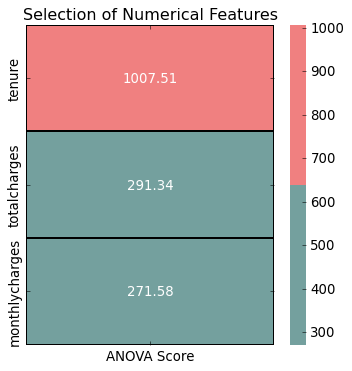

In [45]:
#define variables
features = data.loc[:,numerical_features]
target = data.loc[:,'churn']

#ANOVA test
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

#store best scores for each feature
featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

#plot
fig = plt.figure(figsize = (5,5))
fig.patch.set_facecolor('white')
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');
#save image
fig.savefig('./images/3. Feature Selection/Selection of Numerical Features.png', bbox_inches='tight')

* According to the **ANOVA test**, **higher the value of the ANOVA score, higher the importance of the feature**.
* From the above results, we need to **include all the numerical features for modeling.**

### Final Selection

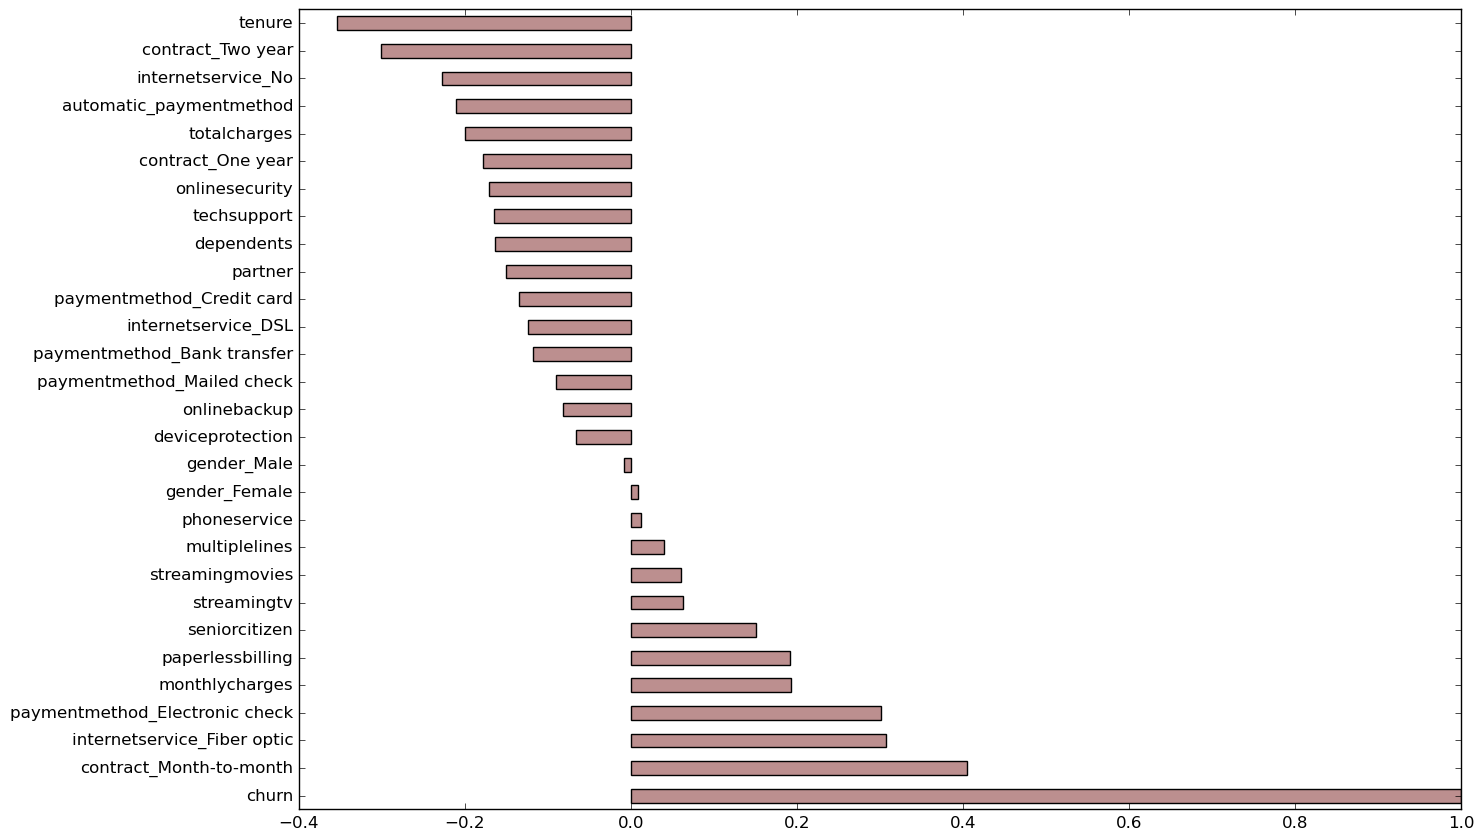

In [46]:
#Get Correlation of "Churn" with other variables:
fig = plt.figure(figsize = (15,10),dpi=100)
plt.style.use('classic')
fig.patch.set_facecolor('white')

data.corr()['churn'].sort_values(ascending = False).plot(kind='barh',color = 'rosybrown')
#save image
fig.savefig('./images/3. Feature Selection/Barplot Correlations of Churn.png', bbox_inches='tight')

* From the features selection we did before and from the , we conclude that the columns **streamingTV, streamingmovies, multiple lines, phoneservice, gender_Female, gender_Male, deviceprotection, onlinebackup and paymentmethod_Mailed check** display a very low relation with churn, thus we exclude them.

In [47]:
#drop columns
data.drop(columns = ['phoneservice', 'gender_Male', 'gender_Female', 'multiplelines', 'streamingmovies',\
                     'multiplelines','phoneservice','gender_Female','gender_Male', 'deviceprotection',\
                     'onlinebackup','paymentmethod_Mailed check'],inplace = True)
data.head()

seniorcitizen  partner  dependents  tenure  onlinesecurity  techsupport  \
0              0        1           0       1               0            0   
1              0        0           0      34               1            0   
2              0        0           0       2               1            0   
3              0        0           0      45               1            1   
4              0        0           0       2               0            0   

   streamingtv  paperlessbilling  automatic_paymentmethod  \
0            0                 1                        0   
1            0                 0                        0   
2            0                 1                        0   
3            0                 0                        1   
4            0                 1                        0   

   internetservice_DSL  ...  internetservice_No  contract_Month-to-month  \
0                    1  ...                   0                        1   
1                    1  ...                   0                        0   
2                    1  ...                   0                        1   
3                    1  ...                   0                        0   
4                    0  ...                   0                        1   

   contract_One year  contract_Two year  paymentmethod_Bank transfer  \
0                  0                  0                            0   
1                  1                  0                            0   
2                  0                  0                            0   
3                  1                  0                            1   
4                  0                  0                            0   

   paymentmethod_Credit card  paymentmethod_Electronic check  monthlycharges  \
0                          0                               1           29.85   
1                          0                               0           56.95   
2                          0                               0           53.85   
3                          0                               0           42.30   
4                          0                               1           70.70   

   totalcharges  churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1  
3       1840.75      0  
4        151.65      1  

[5 rows x 21 columns]

> ## Feature Engineering

In [48]:
#define X,y
X = data.drop(columns = 'churn')
y = data['churn'].values

#split into train test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify =y)

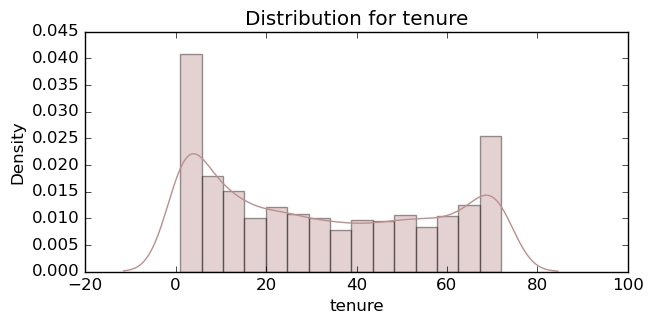

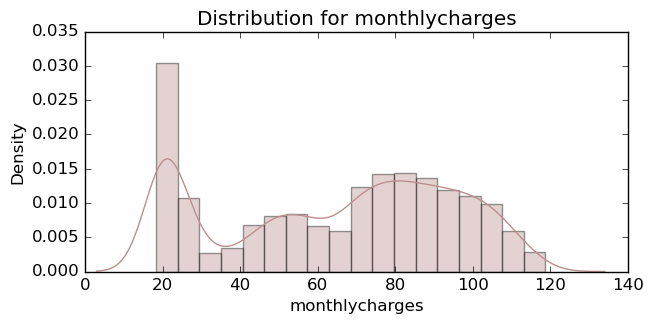

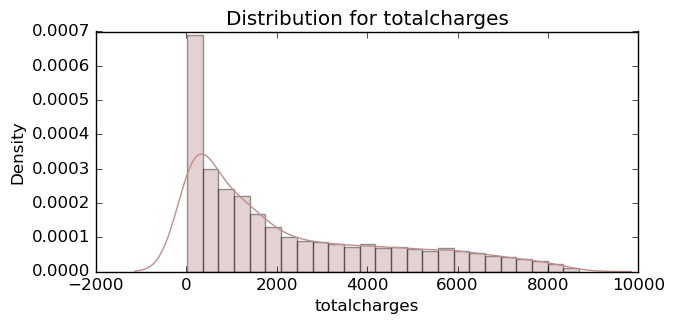

In [49]:
#isolate continious features
col =  ['tenure', 'monthlycharges', 'totalcharges']

#distplots
for features in col :distplot(features, data)

* The features need **standard scaling** as all of them are **distributed over different range values**.

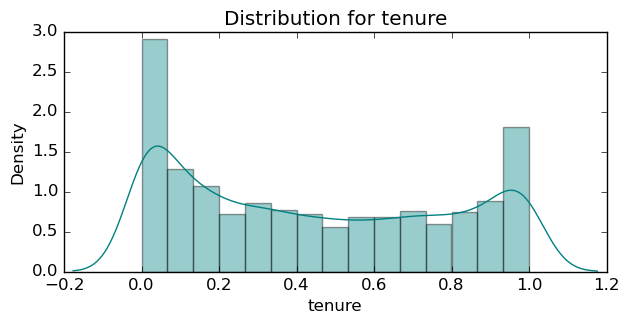

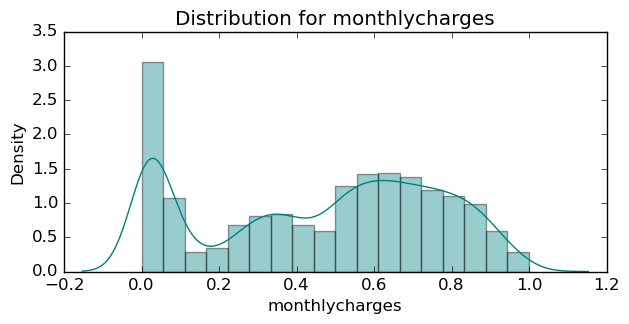

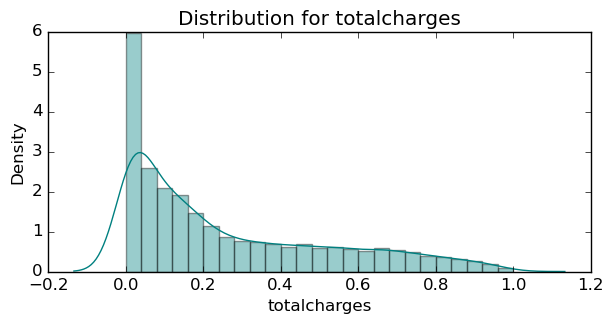

In [50]:
#standardize continuous 
data_std = pd.DataFrame(MinMaxScaler().fit_transform(data[col]).astype('float64'), columns = col)

#plot again standardized features
for feat in col: distplot(feat, data_std, color='teal',when='after scaling')


In [51]:
#standardizing continuous features
scaler = MinMaxScaler()
x_train[col] = scaler.fit_transform(x_train[col])
x_test[col] = scaler.transform(x_test[col])

### Creating Balanced Dataset

In [52]:
pd.DataFrame(y_train,columns=['churn']).value_counts()

churn
0        4130
1        1495
dtype: int64

* It is pretty obvious that our **dataset is imbalanced**.
* We will use an **oversample** technique called SMOTE to overpass that issue.

**oversampling**

In [53]:
# for reproducibility purposes
seed = 50

# SMOTE number of neighbors
k = 1

#smote oversample
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

#fit
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

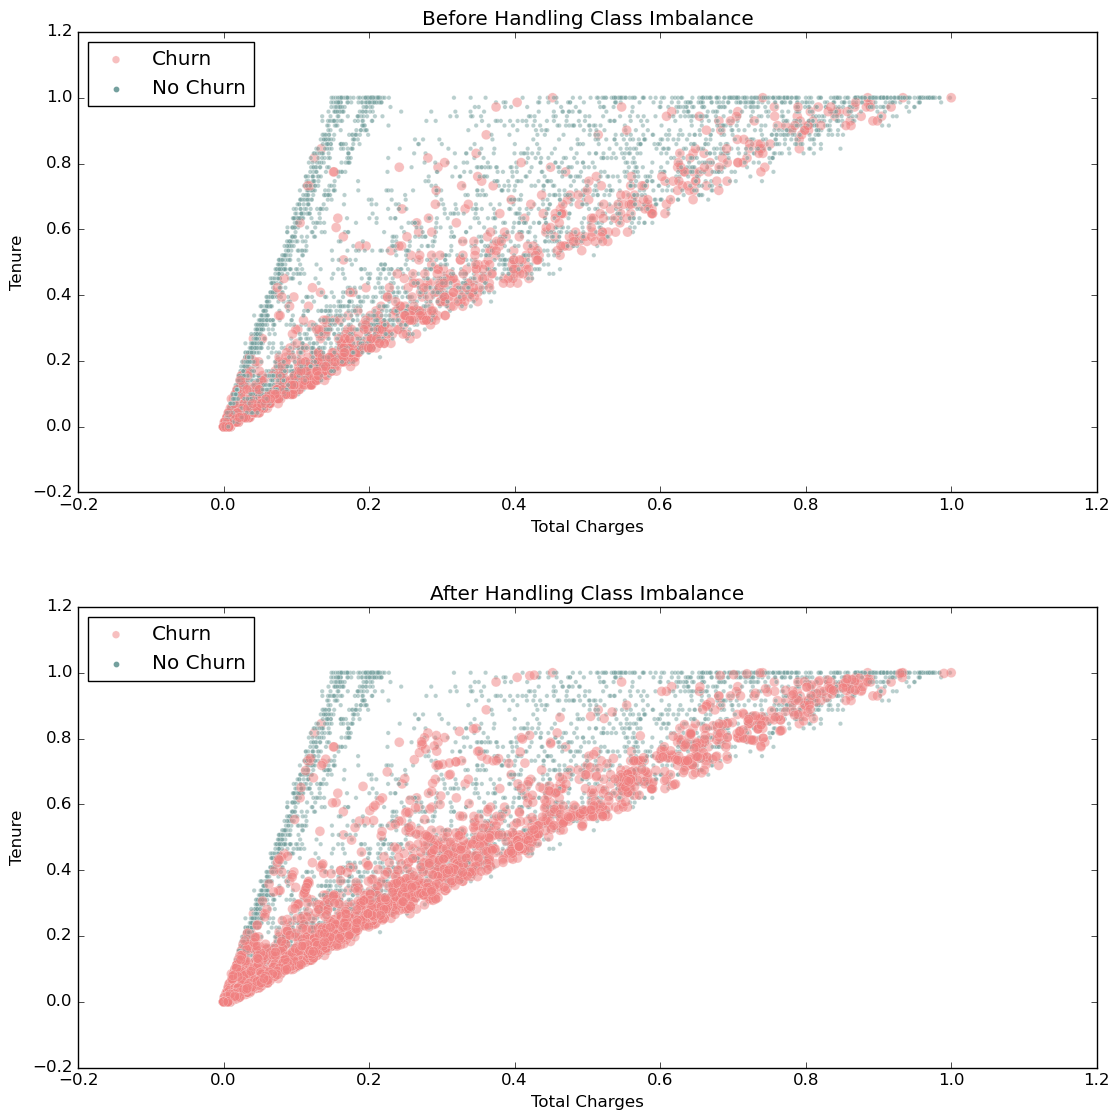

In [54]:
#create figure
fig, ax = plt.subplots(2,1,figsize=(12,12), dpi=100, facecolor='white')

#create before handling scatterplot
sns.scatterplot(x=x_train.totalcharges, y=x_train.tenure, hue=y_train, size=y_train, sizes=[10,50], alpha=0.5, ax=ax[0],palette=colors)
ax[0].set_xlabel('Total Charges')
ax[0].set_ylabel('Tenure')
ax[0].set_title('Before Handling Class Imbalance')
ax[0].legend(labels=['Churn','No Churn'], scatterpoints=1,loc = 'upper left')

#create after handling scatterplot
sns.scatterplot(x=x_train_res.totalcharges, y=x_train_res.tenure, hue=y_train_res, size=y_train_res, sizes=[10,50], alpha=0.5, ax=ax[1],palette=colors)
ax[1].set_xlabel('Total Charges')
ax[1].set_ylabel('Tenure')
ax[1].set_title('After Handling Class Imbalance')
ax[1].legend(labels=['Churn','No Churn'] ,scatterpoints=1,loc = 'upper left')
fig.tight_layout(pad=3)
fig.show()
#save image
fig.savefig('./images/4. Feature Engineering/Before vs After Handling Class Imbalance.png', bbox_inches='tight')

> ## Modeling

### Cross Validation of the models

In [55]:
#define models for classification
models = [['Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')],
          ['SVC', SVC(kernel = 'linear', random_state = 0)],
          ['Kernel SVM', SVC(kernel = 'rbf', random_state = 0)],
          ['KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)],
          ['Gaussian NB', GaussianNB()],
          ['Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)],
          ['Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)],
          ['Adaboost', AdaBoostClassifier()],
          ['Gradient boost Classifier', GradientBoostingClassifier()],
          ['XGBoost Classifier',XGBClassifier(objective="binary:logistic", random_state=0)]]

In [56]:
# set starting time
start_time = datetime.now()

# run function for cross validation to get the results
cv_scores = cross_validation_of_models(models,x_train_res,y_train_res)

#end time
end_time = datetime.now()

#total execution time
total_time = end_time - start_time

print(f'Execution time: {total_time}')

Execution time: 0:00:24.706336


In [57]:
cv_scores

Precision  Recall  F1 Score  ROC  Accuracy
Random Forest                   0.82    0.87      0.85 0.92      0.84
XGBoost Classifier              0.81    0.84      0.83 0.91      0.82
KNN                             0.76    0.89      0.82 0.87      0.80
Gradient boost Classifier       0.77    0.83      0.80 0.87      0.79
Adaboost                        0.75    0.84      0.79 0.86      0.78
Kernel SVM                      0.76    0.83      0.79 0.86      0.78
Decision Tree Classifier        0.77    0.80      0.78 0.78      0.78
Logistic Regression             0.75    0.81      0.78 0.85      0.77
Gaussian NB                     0.73    0.81      0.77 0.84      0.76
SVC                             0.71    0.84      0.77 0.85      0.75

### Hyperparameter tuning

In [58]:
#list with hyperparameters to test
param_grid = [['LogisticRegression', {'penalty': ['l1','l2'],
                                       'C': np.arange(0.01, 1, 0.01),
                                       'solver': ['liblinear','lbfgs','sag','saga'],
                                       'max_iter': range(100,600,100)}],
               ['SVC', {'kernel':['linear'],
                        'degree':np.arange(0, 10, 1),
                        'gamma':['scale', 'auto'],
                        'decision_function_shape':['ovo','ovr']}],
               ['Kernel SVM',{'degree':np.arange(0, 10, 1),
                        'gamma':['scale', 'auto'],
                        'decision_function_shape':['ovo','ovr']}],
               ['KNN',{'weights':['uniform','distance'],
                       'algorithm':['auto','ball_tree','kd_tree','brute']}],
               ['Gaussian NB',{}],
               ['Decision Tree Classifier',{'criterion':['gini','entropy','log_loss'],
                   'splitter':['best','random'],
                   'max_features':['auto','sqrt','log2']}],
               ['Random Forest',{'criterion':['gini','entropy','log_loss'],
                   'max_features':['sqrt','log2'],
                   'class_weight':['balnced','balanced_subsample',None],
                   'n_estimators': range(100,1300,300)}],
               ['Adaboost',{'algorithm':['SAMME','SAMME.R']}],
               ['Gradient boost classifier',{'loss':['log_loss','deviance','exponential'],
                   'criterion':['friedman_mse','squared_error','mse'],
                   'max_features':['auto','sqrt','log2']}],
               ['XGBoost Classifier',{'gamma': (0, 0.5),
                     'learning_rate': (0.1,0.2, 0.3), 
                     'max_depth': (2,4,6),
                     'n_estimators': (50,100,150)}]]

In [59]:
#starting time
start_time = datetime.now()

#execute function for hyperparameter tuning (GridSearchCV)
gs_scores = hyperparameter_tuning(models,param_grid,x_train_res, y_train_res)

#end time
end_time = datetime.now()

#total execution time
total_time = end_time - start_time

print(f'Execution time: {total_time}')

Logistic Regression
----------------------------------------------------------------------------------------------------------
Best grid score: 0.7797063363848938
Best grid params: {'C': 0.85, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best estimator: LogisticRegression(C=0.85, class_weight='balanced', penalty='l1',
                   random_state=0, solver='saga')

SVC
----------------------------------------------------------------------------------------------------------
Best grid score: 0.7675872983100058
Best grid params: {'decision_function_shape': 'ovo', 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}
Best estimator: SVC(decision_function_shape='ovo', degree=0, kernel='linear', random_state=0)

Kernel SVM
----------------------------------------------------------------------------------------------------------
Best grid score: 0.7916704937123528
Best grid params: {'decision_function_shape': 'ovo', 'degree': 0, 'gamma': 'scale'}
Best estimator: SVC(decision_function_

In [60]:
#create a list with the tuned classifiers
models = [['Logistic Regression',LogisticRegression(C=0.85, class_weight='balanced', penalty='l1',random_state=0, solver='saga')],
          ['SVC', SVC(decision_function_shape='ovo', degree=0, kernel='linear',probability=True, random_state=0)],
          ['Kernel SVM', SVC(decision_function_shape='ovo', degree=0,probability=True, random_state=0)],
          ['KNN', KNeighborsClassifier(algorithm='ball_tree', weights='distance')],
          ['Gaussian NB', GaussianNB()],
          ['Decision Tree Classifier',  DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0,
                   splitter='random')],
          ['Random Forest', RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)],
          ['Adaboost', AdaBoostClassifier(random_state=0)],
          ['Gradient boost classifier', GradientBoostingClassifier(max_features='auto', random_state=0)],
          ['XGBoost Classifier',XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                                              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                                              early_stopping_rounds=None, enable_categorical=False,
                                              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
                                              grow_policy='depthwise', importance_type=None,
                                              interaction_constraints='', learning_rate=0.2, max_bin=256,
                                              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
                                              max_depth=6, max_leaves=0, min_child_weight=1, missing=np.nan,
                                              monotone_constraints='()', n_estimators=150, n_jobs=0,
                                              num_parallel_tree=1, predictor='auto', random_state=0)]]

### Evaluation of the model

# 1 - Logistic Regression
                     Precision  Recall  F1 Score  ROC  Accuracy
Logistic Regression       0.52    0.78      0.62 0.76      0.75


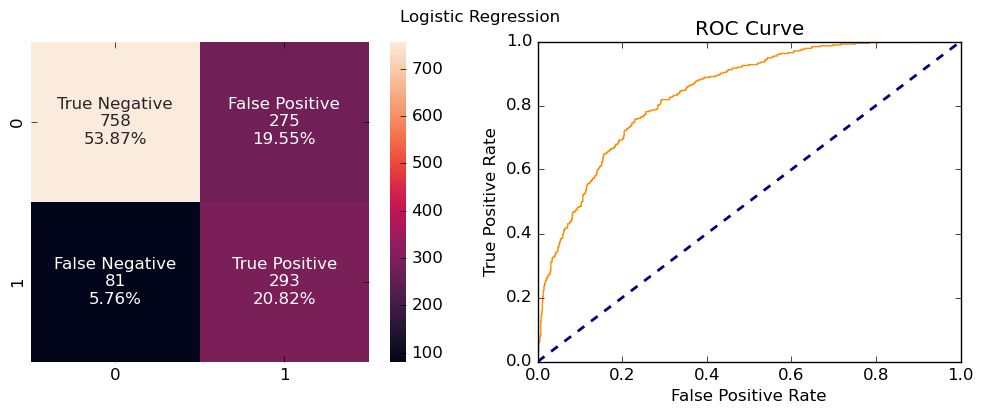

# 2 - SVC
     Precision  Recall  F1 Score  ROC  Accuracy
SVC       0.46    0.84      0.59 0.74      0.69


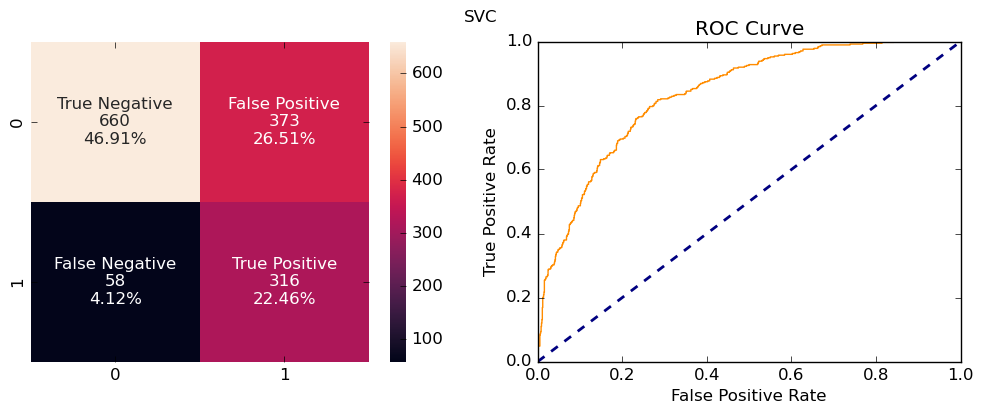

# 3 - Kernel SVM
            Precision  Recall  F1 Score  ROC  Accuracy
Kernel SVM       0.51    0.77      0.61 0.75      0.74


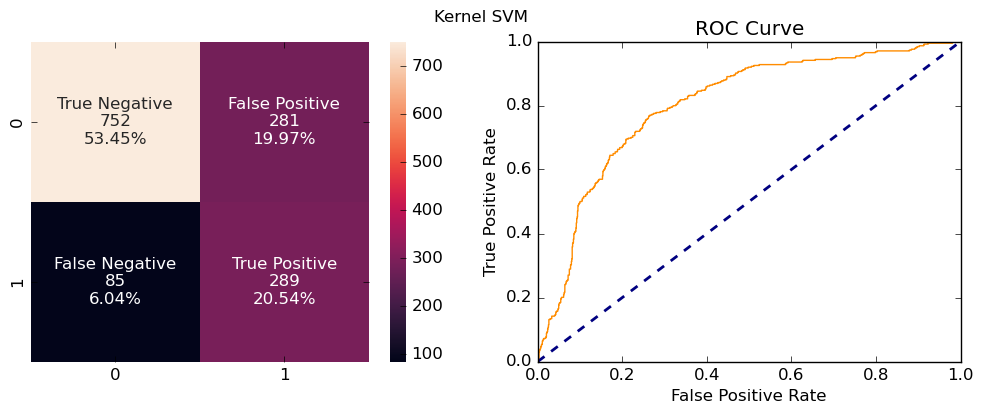

# 4 - KNN
     Precision  Recall  F1 Score  ROC  Accuracy
KNN       0.48    0.64      0.55 0.69      0.72


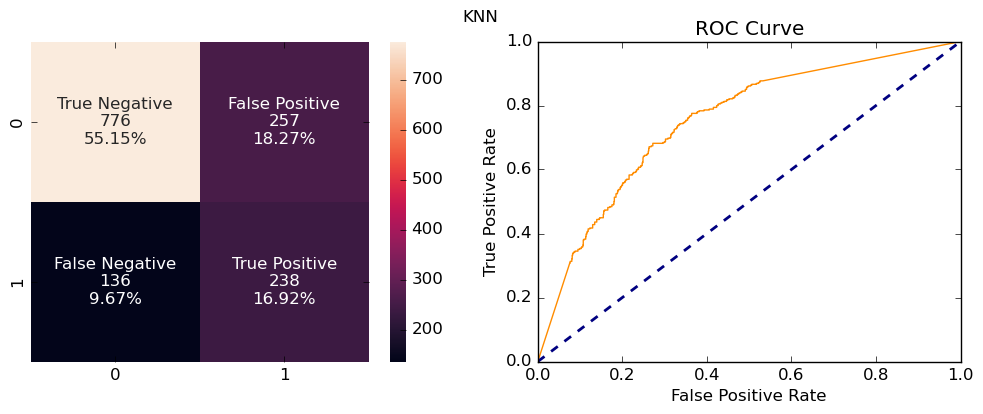

# 5 - Gaussian NB
             Precision  Recall  F1 Score  ROC  Accuracy
Gaussian NB       0.49    0.80      0.61 0.75      0.73


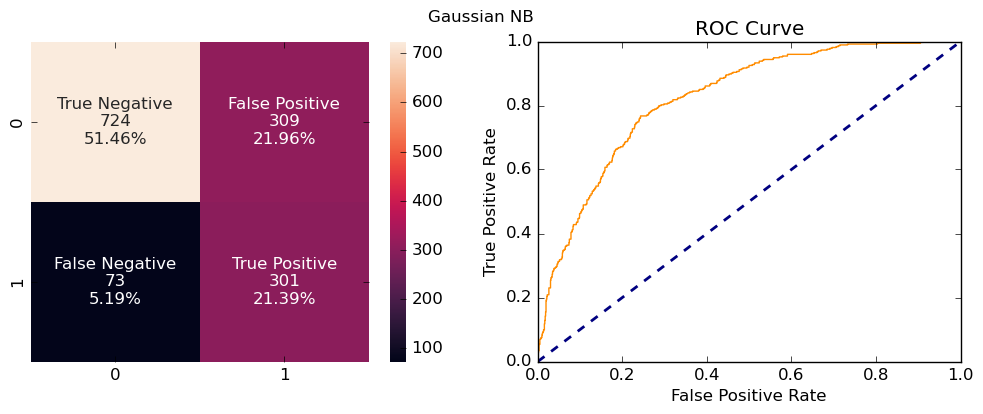

# 6 - Decision Tree Classifier
                          Precision  Recall  F1 Score  ROC  Accuracy
Decision Tree Classifier       0.46    0.52      0.49 0.65      0.71


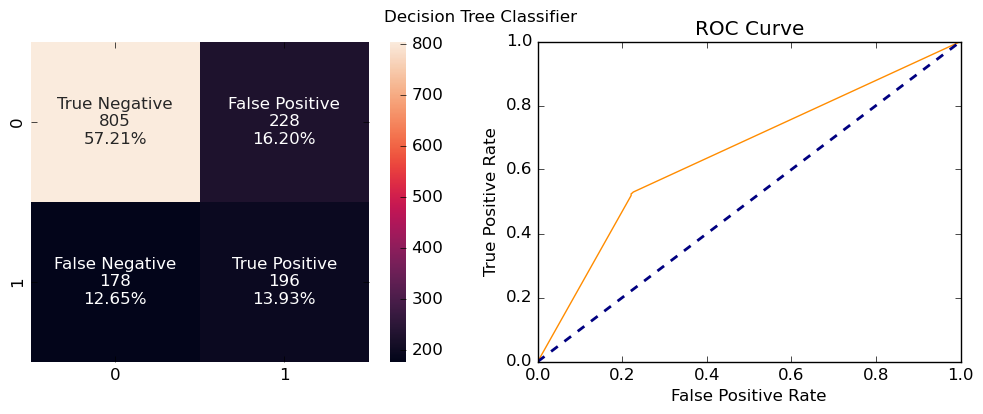

# 7 - Random Forest
               Precision  Recall  F1 Score  ROC  Accuracy
Random Forest       0.53    0.59      0.56 0.70      0.75


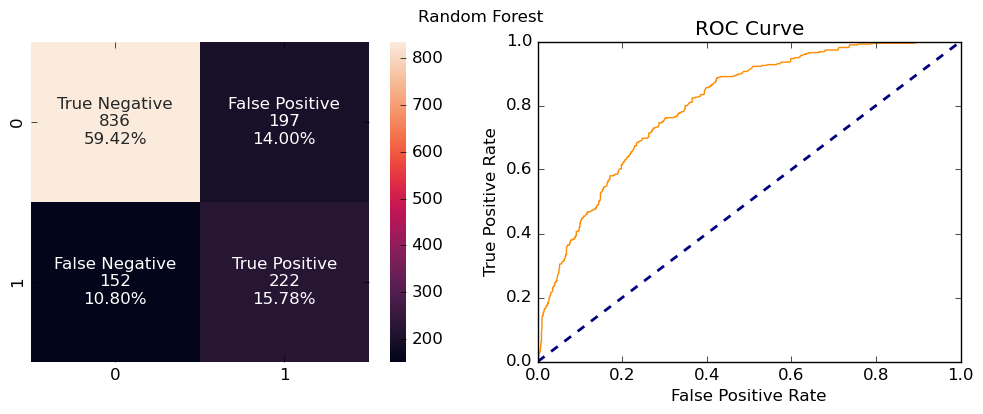

# 8 - Adaboost
          Precision  Recall  F1 Score  ROC  Accuracy
Adaboost       0.50    0.79      0.61 0.75      0.73


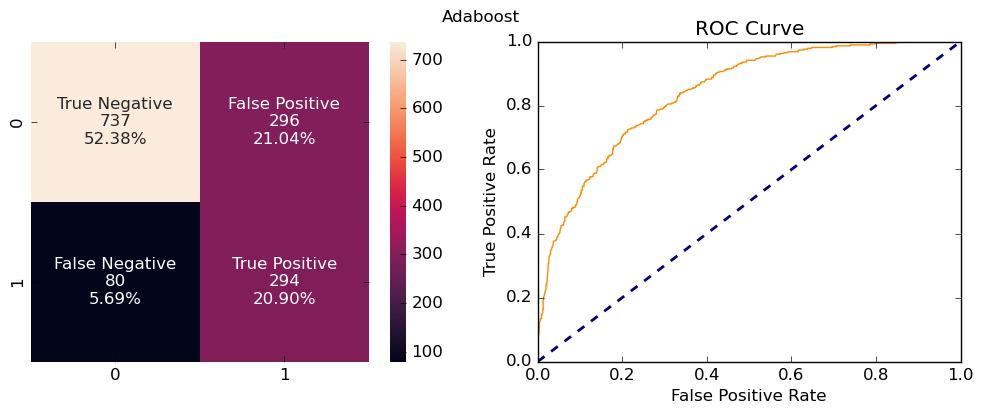

# 9 - Gradient boost classifier
                           Precision  Recall  F1 Score  ROC  Accuracy
Gradient boost classifier       0.50    0.74      0.60 0.74      0.74


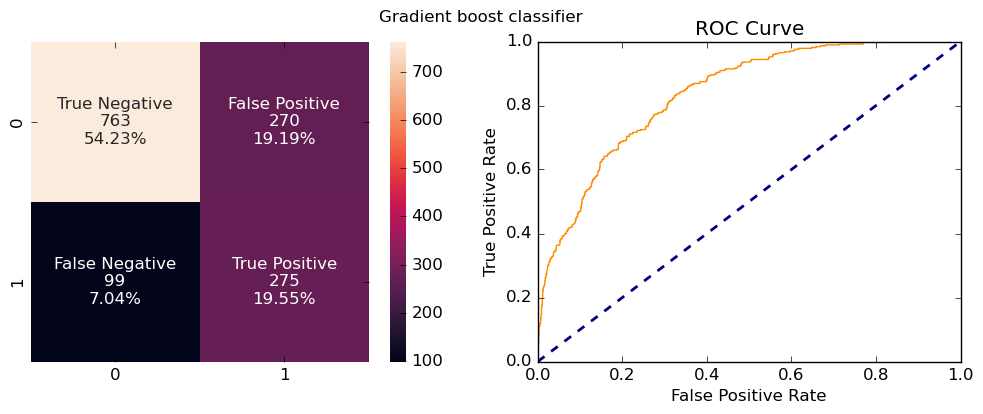

# 10 - XGBoost Classifier
                    Precision  Recall  F1 Score  ROC  Accuracy
XGBoost Classifier       0.54    0.66      0.59 0.73      0.76


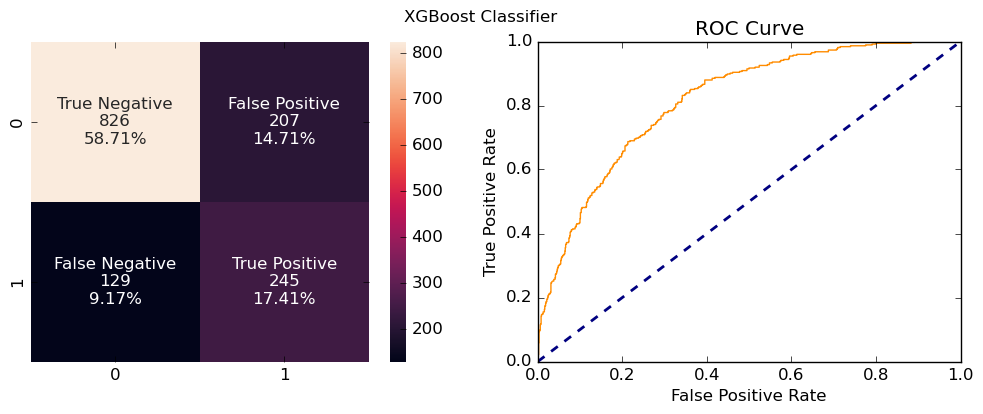

Execution time: 0:00:27.717624


In [61]:
# set starting time
start_time = datetime.now()

# run function to evaluate the performance between classifiers and get the results
prediction_results = classification_prediction(models, x_train_res, x_test, y_train_res, y_test)

# set ending time
end_time = datetime.now()

#total execution time
total_time = end_time - start_time

print(f'Execution time: {total_time}')

In [62]:
prediction_results

Precision  Recall  F1 Score  ROC  Accuracy
Logistic Regression             0.52    0.78      0.62 0.76      0.75
Kernel SVM                      0.51    0.77      0.61 0.75      0.74
Gaussian NB                     0.49    0.80      0.61 0.75      0.73
Adaboost                        0.50    0.79      0.61 0.75      0.73
Gradient boost classifier       0.50    0.74      0.60 0.74      0.74
SVC                             0.46    0.84      0.59 0.74      0.69
XGBoost Classifier              0.54    0.66      0.59 0.73      0.76
Random Forest                   0.53    0.59      0.56 0.70      0.75
KNN                             0.48    0.64      0.55 0.69      0.72
Decision Tree Classifier        0.46    0.52      0.49 0.65      0.71

> ## Feature Importance

**Top 10 most important features regarding Logistic Regression**

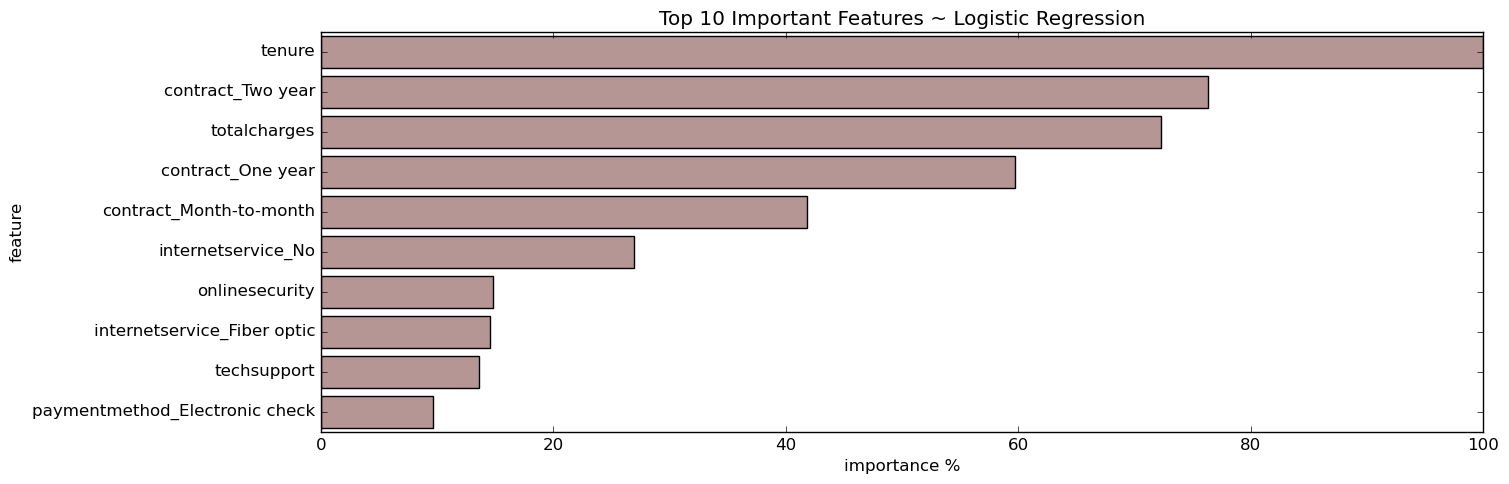

In [63]:
#define logistic regression model
name = 'Logistic Regression'
model = LogisticRegression(C=0.85, penalty='l1', random_state=0, solver='saga')

#run function for feature importance and get the top 10 most important features
get_feature_importances(model,name, x_train_res,y_train_res)

**Top 10 most important features regarding Support Vector Classification (SVC)**

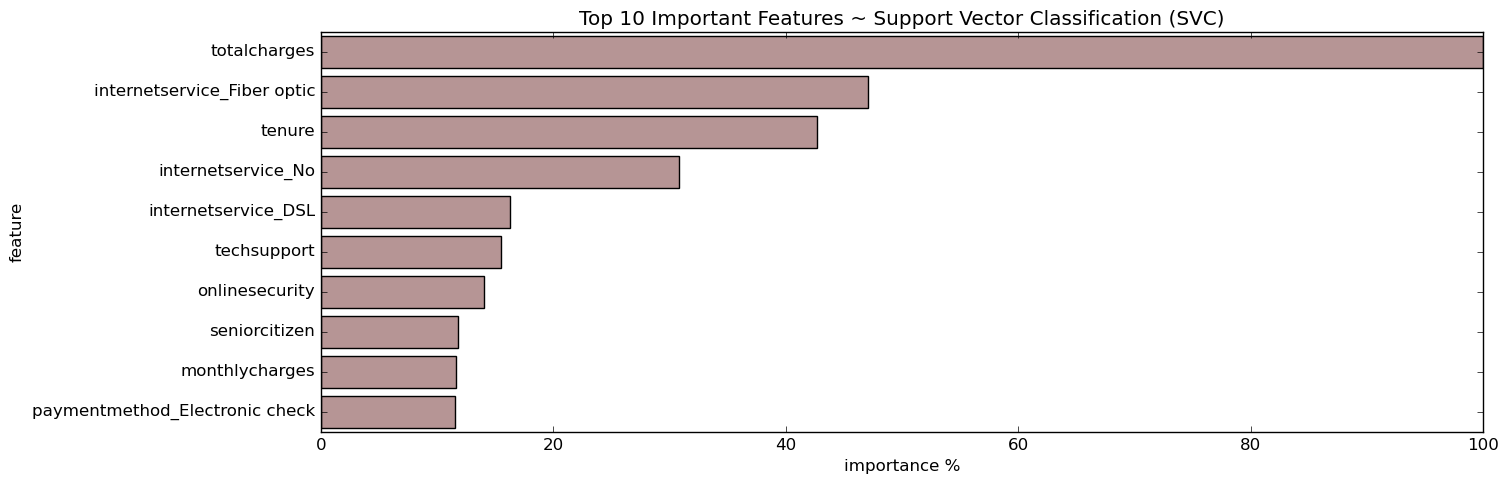

In [64]:
#define logistic regression model
name = 'Support Vector Classification (SVC)'
model = SVC(decision_function_shape='ovo', degree=0, kernel='linear',probability=True, random_state=0)

#run function for feature importance and get the top 10 most important features
get_feature_importances(model,name,x_train,y_train)

**Top 10 most important features regarding XGBoost Classifier**

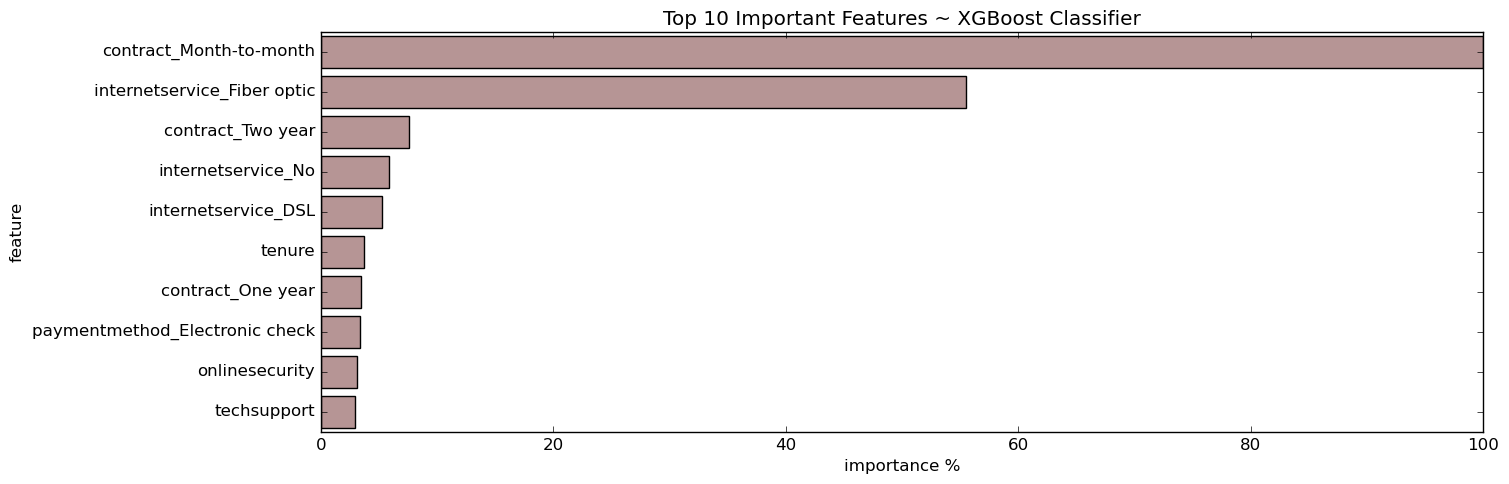

In [65]:
#define XGBoost Classifier model
name = 'XGBoost Classifier'
model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                      colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                      early_stopping_rounds=None, enable_categorical=False,
                      eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
                      grow_policy='depthwise', importance_type=None,
                      interaction_constraints='', learning_rate=0.2, max_bin=256,
                      max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
                      max_depth=6, max_leaves=0, min_child_weight=1, missing=np.nan,
                      monotone_constraints='()', n_estimators=150, n_jobs=0,
                      num_parallel_tree=1, predictor='auto', random_state=0)

get_feature_importances(model,name,x_train_res,y_train_res)

#run function for feature importance and get the top 10 most important features
#feature_importance(model,name, x_train_res,y_train_res)

> ## Conclusion

In order to select the model with the best overall performance we must define the metrics we used:

**Precision:** The  percentage of predicted customers who actually left the company. (@sureness)

**Recall:** The percentage of customers whose attrition the model correctly predicted (@sensitivity)

**F1 Score:** The harmonic mean of the precision and the recall. It is a balanced value between precision and recall.

**Logistic Regression** has the **best F1-score** compared to the other models we used. This means that it has the best overall performance in order to balance precision and recall.

**Support Vector Classifier** has the **best Recall score** which means that the model predict more accurate the customers that had actually churned. 

**XGBoost Classifier** has the **best Precision score** which means that the model determines more efficient how many of the predicted customers actually drop out.  On the other had, the model with a high precision score is more willing to accept a prediction with less proof which will lead us to predict some customers as churned but acctually they are loyal.


### ***So what model the company should choose?***

**Cost Evaluation through Financial Cost Effective Strategy** : *Applying 2 times higher cost to false negative than false positive*
(https://www.listendata.com/2015/09/cost-sensitive-learning-for-churn-model.html)

There are costs associated with the model incorrectly assigning false positive and false negative results and costs associated with correctly predicting true positive and true negative results. It is therefore important to consider the relative costs to the firm for each of these four outcomes for each forecast.

Αccording to the publication on the website https://www.huntclub.com/blog/average-customer-acquisition-cost, the **average customer acquisition cost** for telecom is **300** euros.

So, what are the company's costs regarding customer churn? We will make some assumptions here.

1. We will assign the **true negatives** the cost of **0 euros**. In this case, the model essentially correctly identified a happy customer and the company does not need to do any action.

2. **False negatives** are the **most problematic**, because they incorrectly predict that a churning customer will stay. The company will lose the customer and will have to pay all the costs of acquiring a replacement customer, including foregone revenue, advertising costs, administrative costs, point of sale costs. A quick search on the Internet reveals that such costs typically run in the hundreds of euros so, we will assume **300 euros**. This is the cost of false negatives.

3. Finally, for customers that the model identifies as churning, we will assume a retention incentive in the amount of **150 euros**. This is the cost of both **true positive and false positive** outcomes.In the case of false positives (the customer is happy, but the model mistakenly predicted churn), we will "waste" the **150 euros** concession.

It's clear that **false negatives are substantially more costly than false positives**. 

To understand what is the best model for the company to use to reduce its costs we should **minimize a cost function** that looks like this:

**Cost = 300FN(C) + 0TN(C) + 150FP(C) + 150TP(C) , where C:Count**

* Regarding ***Logistic Regression***:
 * FN(C) = 81
 * TN(C) = 758
 * FP(C) = 275
 * TP(C) = 293
 
 Cost_LR = 300 * 81 + 0 * 758 +  150 * 275 + 150 * 293 = 109,500 euros


* Regrading ***Support Vector Classifier***:
 * FN(C) = 58
 * TN(C) = 660
 * FP(C) = 373
 * TP(C) = 316
 
 Cost_SVC = 300 * 58 + 0 * 660 + 150 * 373 + 150 * 316 = 120,750 euros


* Regarding ***XGBoost Classifier***:
 * FN(C) = 129
 * TN(C) = 826
 * FP(C) = 207
 * TP(C) = 245
 
 Cost_XGBC = 300 * 129 + 0 * 826 + 150 * 207 + 150 * 245 = 106,500 euros 
 